In [1]:
import pandas as pd
import csv
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [9]:
STEP_TIME = 100
df_dump_FLO = pd.read_csv("/home/victoria/spikes_results_FLO/result_FLO.csv", delimiter=",")
#df_dump_JAM = pd.read_csv("/home/victoria/spikes_results_JAM/result_JAM.csv", delimiter=",")
df_normal = pd.read_csv("/home/victoria/spikes_results_normal/normal.csv")



In [26]:
STEP_TIME = 100
df_dump_JAM = pd.read_csv("/home/victoria/spikes_results_JAM/result_JAM.csv", delimiter=",")
df_normal = pd.read_csv("/home/victoria/spikes_results_normal/normal.csv")

## Number of spikes
### FLO attack

In [10]:
df_dump_FLO["timestamps"] = df_dump_FLO["timestamps"].round(1)

df_dump_FLO['position'] = 0
df_dump_FLO['position'] = df_dump_FLO['timestamps']/STEP_TIME
df_dump_FLO['position'] = df_dump_FLO['position'].apply(lambda x: np.floor(x))
df_dump_FLO['position'] = df_dump_FLO['position'].astype(int)

df_dump_FLO = pd.DataFrame(df_dump_FLO.groupby(["attack","instants_attack","voltage","n_neurons","n_exec","timestamps","position"])["node_ids"].count())
df_dump_FLO.reset_index(inplace=True)

df_dump_FLO

attack  instants_attack  voltage  n_neurons  n_exec  timestamps  \
0          FLO               10        5         50       0        19.5   
1          FLO               10        5         50       0        21.4   
2          FLO               10        5         50       0        32.7   
3          FLO               10        5         50       0        52.2   
4          FLO               10        5         50       0        52.4   
...        ...              ...      ...        ...     ...         ...   
7451162    FLO               10      551        450       9      2999.6   
7451163    FLO               10      551        450       9      2999.7   
7451164    FLO               10      551        450       9      2999.8   
7451165    FLO               10      551        450       9      2999.9   
7451166    FLO               10      551        450       9      3000.0   

         position  node_ids  
0               0         1  
1               0         1  
2               0         1  
3               0         1  
4               0         1  
...           ...       ...  
7451162        29         1  
7451163        29         1  
7451164        29         3  
7451165        29         2  
7451166        30         3  

[7451167 rows x 8 columns]

In [44]:
df_dump_FLO[(df_dump_FLO.n_neurons == 50) & (df_dump_FLO.voltage != "V_th")  & (df_dump_FLO.position == 0) & (df_dump_FLO.voltage == 5)]

attack  instants_attack voltage  n_neurons  n_exec  timestamps  position  \
0      FLO               10       5         50       0        21.4         0   
1      FLO               10       5         50       0        21.6         0   
2      FLO               10       5         50       0        32.7         0   
3      FLO               10       5         50       0        52.3         0   
4      FLO               10       5         50       0        52.4         0   
..     ...              ...     ...        ...     ...         ...       ...   
294    FLO               10       5         50       0        99.0         0   
295    FLO               10       5         50       0        99.2         0   
296    FLO               10       5         50       0        99.4         0   
297    FLO               10       5         50       0        99.5         0   
298    FLO               10       5         50       0        99.7         0   

     node_ids  
0           1  
1           1  
2           1  
3           1  
4           1  
..        ...  
294         1  
295         1  
296         1  
297         3  
298         2  

[299 rows x 8 columns]

In [45]:
df_dump_FLO[(df_dump_FLO.n_neurons == 50) & (df_dump_FLO.voltage != "V_th")  & (df_dump_FLO.position == 0) & (df_dump_FLO.voltage == "5")]

attack  instants_attack voltage  n_neurons  n_exec  timestamps  \
21952    FLO               10       5         50       0        52.2   
21953    FLO               10       5         50       0        57.2   
21954    FLO               10       5         50       0        57.6   
21955    FLO               10       5         50       0        58.0   
21956    FLO               10       5         50       0        58.1   
...      ...              ...     ...        ...     ...         ...   
22145    FLO               10       5         50       0        98.8   
22146    FLO               10       5         50       0        99.0   
22147    FLO               10       5         50       0        99.3   
22148    FLO               10       5         50       0        99.4   
22149    FLO               10       5         50       0        99.6   

       position  node_ids  
21952         0         1  
21953         0         1  
21954         0         1  
21955         0         1  
21956         0         1  
...         ...       ...  
22145         0         1  
22146         0         1  
22147         0         1  
22148         0         1  
22149         0         2  

[198 rows x 8 columns]

In [11]:
df_normal['attack'] = "Spontaneous"
df_normal = df_normal.drop('Unnamed: 0', axis=1)
df_normal

timestamps  node_ids       attack
0          63.827         0  Spontaneous
1        1449.887       224  Spontaneous
2        1433.860       224  Spontaneous
3        1415.601       224  Spontaneous
4        1388.974       224  Spontaneous
...           ...       ...          ...
76891    1177.530        65  Spontaneous
76892    1171.057        65  Spontaneous
76893    1164.553        65  Spontaneous
76894    1142.583        65  Spontaneous
76895    2995.749       449  Spontaneous

[76896 rows x 3 columns]

In [12]:
df_normal['position'] = 0
df_normal['position'] = df_normal['timestamps']/STEP_TIME
df_normal['position'] = df_normal['position'].apply(lambda x: np.floor(x))
df_normal['position'] = df_normal['position'].astype(int)

df_normal['instants_attack'] = 0
df_normal['voltage'] = 0
df_normal['n_neurons'] = 0
df_normal['n_exec'] = 0

df_normal = pd.DataFrame(df_normal.groupby(["attack","instants_attack","voltage","n_neurons","n_exec","timestamps","position"])["node_ids"].count())
df_normal.reset_index(inplace=True)

df_normal

attack  instants_attack  voltage  n_neurons  n_exec  timestamps  \
0      Spontaneous                0        0          0       0      21.423   
1      Spontaneous                0        0          0       0      21.624   
2      Spontaneous                0        0          0       0      32.691   
3      Spontaneous                0        0          0       0      52.200   
4      Spontaneous                0        0          0       0      52.337   
...            ...              ...      ...        ...     ...         ...   
75601  Spontaneous                0        0          0       0    2999.775   
75602  Spontaneous                0        0          0       0    2999.816   
75603  Spontaneous                0        0          0       0    2999.840   
75604  Spontaneous                0        0          0       0    2999.918   
75605  Spontaneous                0        0          0       0    2999.952   

       position  node_ids  
0             0         1  
1             0         1  
2             0         1  
3             0         1  
4             0         1  
...         ...       ...  
75601        29         1  
75602        29         1  
75603        29         1  
75604        29         1  
75605        29         1  

[75606 rows x 8 columns]

In [6]:
result = pd.concat([df_dump_FLO, df_normal])
result['n_spikes'] = result['node_ids']
result['position'] += 1
result["attack_n_voltage"] = result["attack"].astype("str") + " " + result["voltage"].astype("str")
result.loc[result['attack_n_voltage'].isin(['FLO 551']), ['attack_n_voltage']] = ['FLO V_th']
result = pd.DataFrame(result.groupby(["attack","instants_attack", "voltage","n_neurons","n_exec","position","attack_n_voltage"])["n_spikes"].sum())

result.reset_index(inplace=True)

result

attack  instants_attack  voltage  n_neurons  n_exec  position  \
0             FLO               10        5         50       0         1   
1             FLO               10        5         50       0         2   
2             FLO               10        5         50       0         3   
3             FLO               10        5         50       0         4   
4             FLO               10        5         50       0         5   
...           ...              ...      ...        ...     ...       ...   
9289  Spontaneous                0        0          0       0        26   
9290  Spontaneous                0        0          0       0        27   
9291  Spontaneous                0        0          0       0        28   
9292  Spontaneous                0        0          0       0        29   
9293  Spontaneous                0        0          0       0        30   

     attack_n_voltage  n_spikes  
0               FLO 5       796  
1               FLO 5       976  
2               FLO 5      1245  
3               FLO 5       920  
4               FLO 5       500  
...               ...       ...  
9289    Spontaneous 0      2177  
9290    Spontaneous 0      2649  
9291    Spontaneous 0      3677  
9292    Spontaneous 0      1817  
9293    Spontaneous 0      3315  

[9294 rows x 8 columns]

In [13]:

result = pd.concat([df_dump_FLO, df_normal])
result['n_spikes'] = result['node_ids']
result['position'] += 1
result["attack_n_neurons"] = result["attack"].astype("str") + " " + result["n_neurons"].astype("str")
result.loc[result['attack_n_neurons'].isin(['Spontaneous 0']), ['attack_n_neurons']] = ['Spontaneous']
result = pd.DataFrame(result.groupby(["attack","instants_attack", "voltage","n_neurons","n_exec","position","attack_n_neurons"])["n_spikes"].sum())

result.reset_index(inplace=True)

result

attack  instants_attack  voltage  n_neurons  n_exec  position  \
0             FLO               10        5         50       0         1   
1             FLO               10        5         50       0         2   
2             FLO               10        5         50       0         3   
3             FLO               10        5         50       0         4   
4             FLO               10        5         50       0         5   
...           ...              ...      ...        ...     ...       ...   
9289  Spontaneous                0        0          0       0        26   
9290  Spontaneous                0        0          0       0        27   
9291  Spontaneous                0        0          0       0        28   
9292  Spontaneous                0        0          0       0        29   
9293  Spontaneous                0        0          0       0        30   

     attack_n_neurons  n_spikes  
0              FLO 50       796  
1              FLO 50       976  
2              FLO 50      1245  
3              FLO 50       920  
4              FLO 50       500  
...               ...       ...  
9289      Spontaneous      2177  
9290      Spontaneous      2649  
9291      Spontaneous      3677  
9292      Spontaneous      1817  
9293      Spontaneous      3315  

[9294 rows x 8 columns]

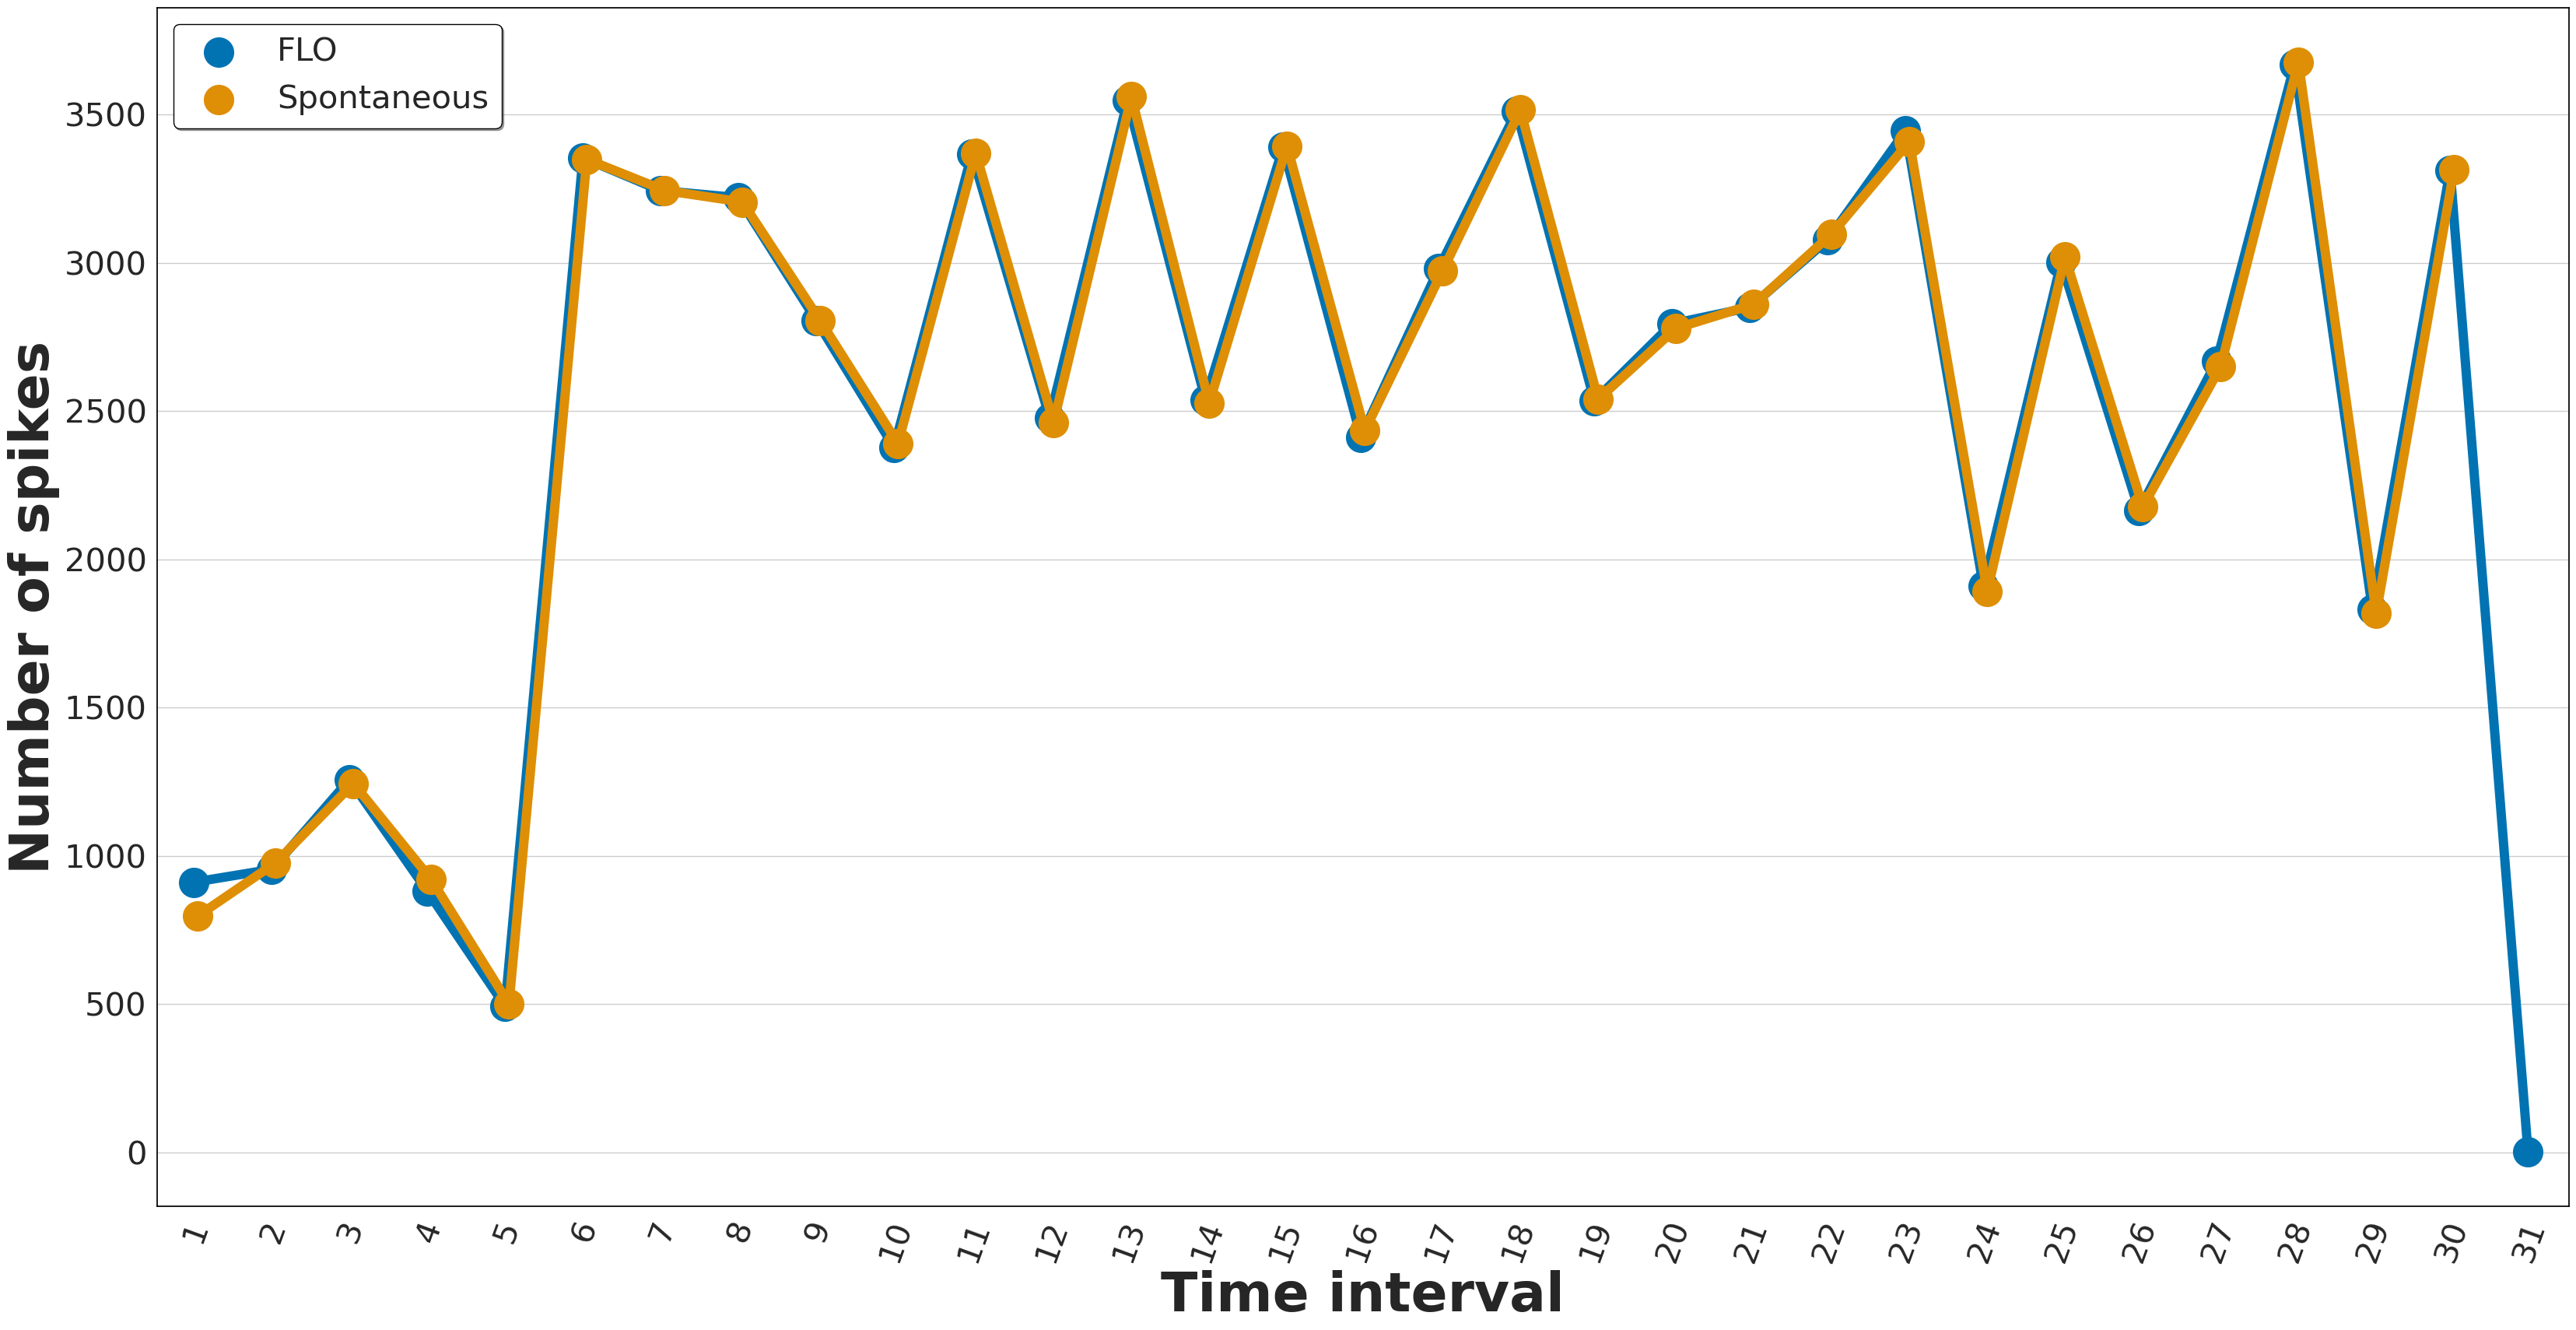

In [9]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set(style="whitegrid",font_scale=2.5, rc={'figure.figsize':(40,20)})
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 50
ticks_size = 30
legend_size = 30
line_size = 25

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result, palette="colorblind", hue="attack", scale=3.2, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='best', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
#plt.show()
plt.savefig("/home/victoria/FLO.pdf", bbox_inches='tight')

In [7]:
result[(result.attack_n_volt == "FLO 50")].voltage.unique()

AttributeError: 'DataFrame' object has no attribute 'attack_n_neurons'

In [26]:
result = result.drop(result[result['voltage'] == '30'].index)

In [25]:
result[(result.attack_n_neurons == "FLO 50") & (result.position == 26)].std()["n_spikes"]

/tmp/ipykernel_610522/2944551192.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  result[(result.attack_n_neurons == "FLO 50") & (result.position == 26)].std()["n_spikes"]


10.569398255680378

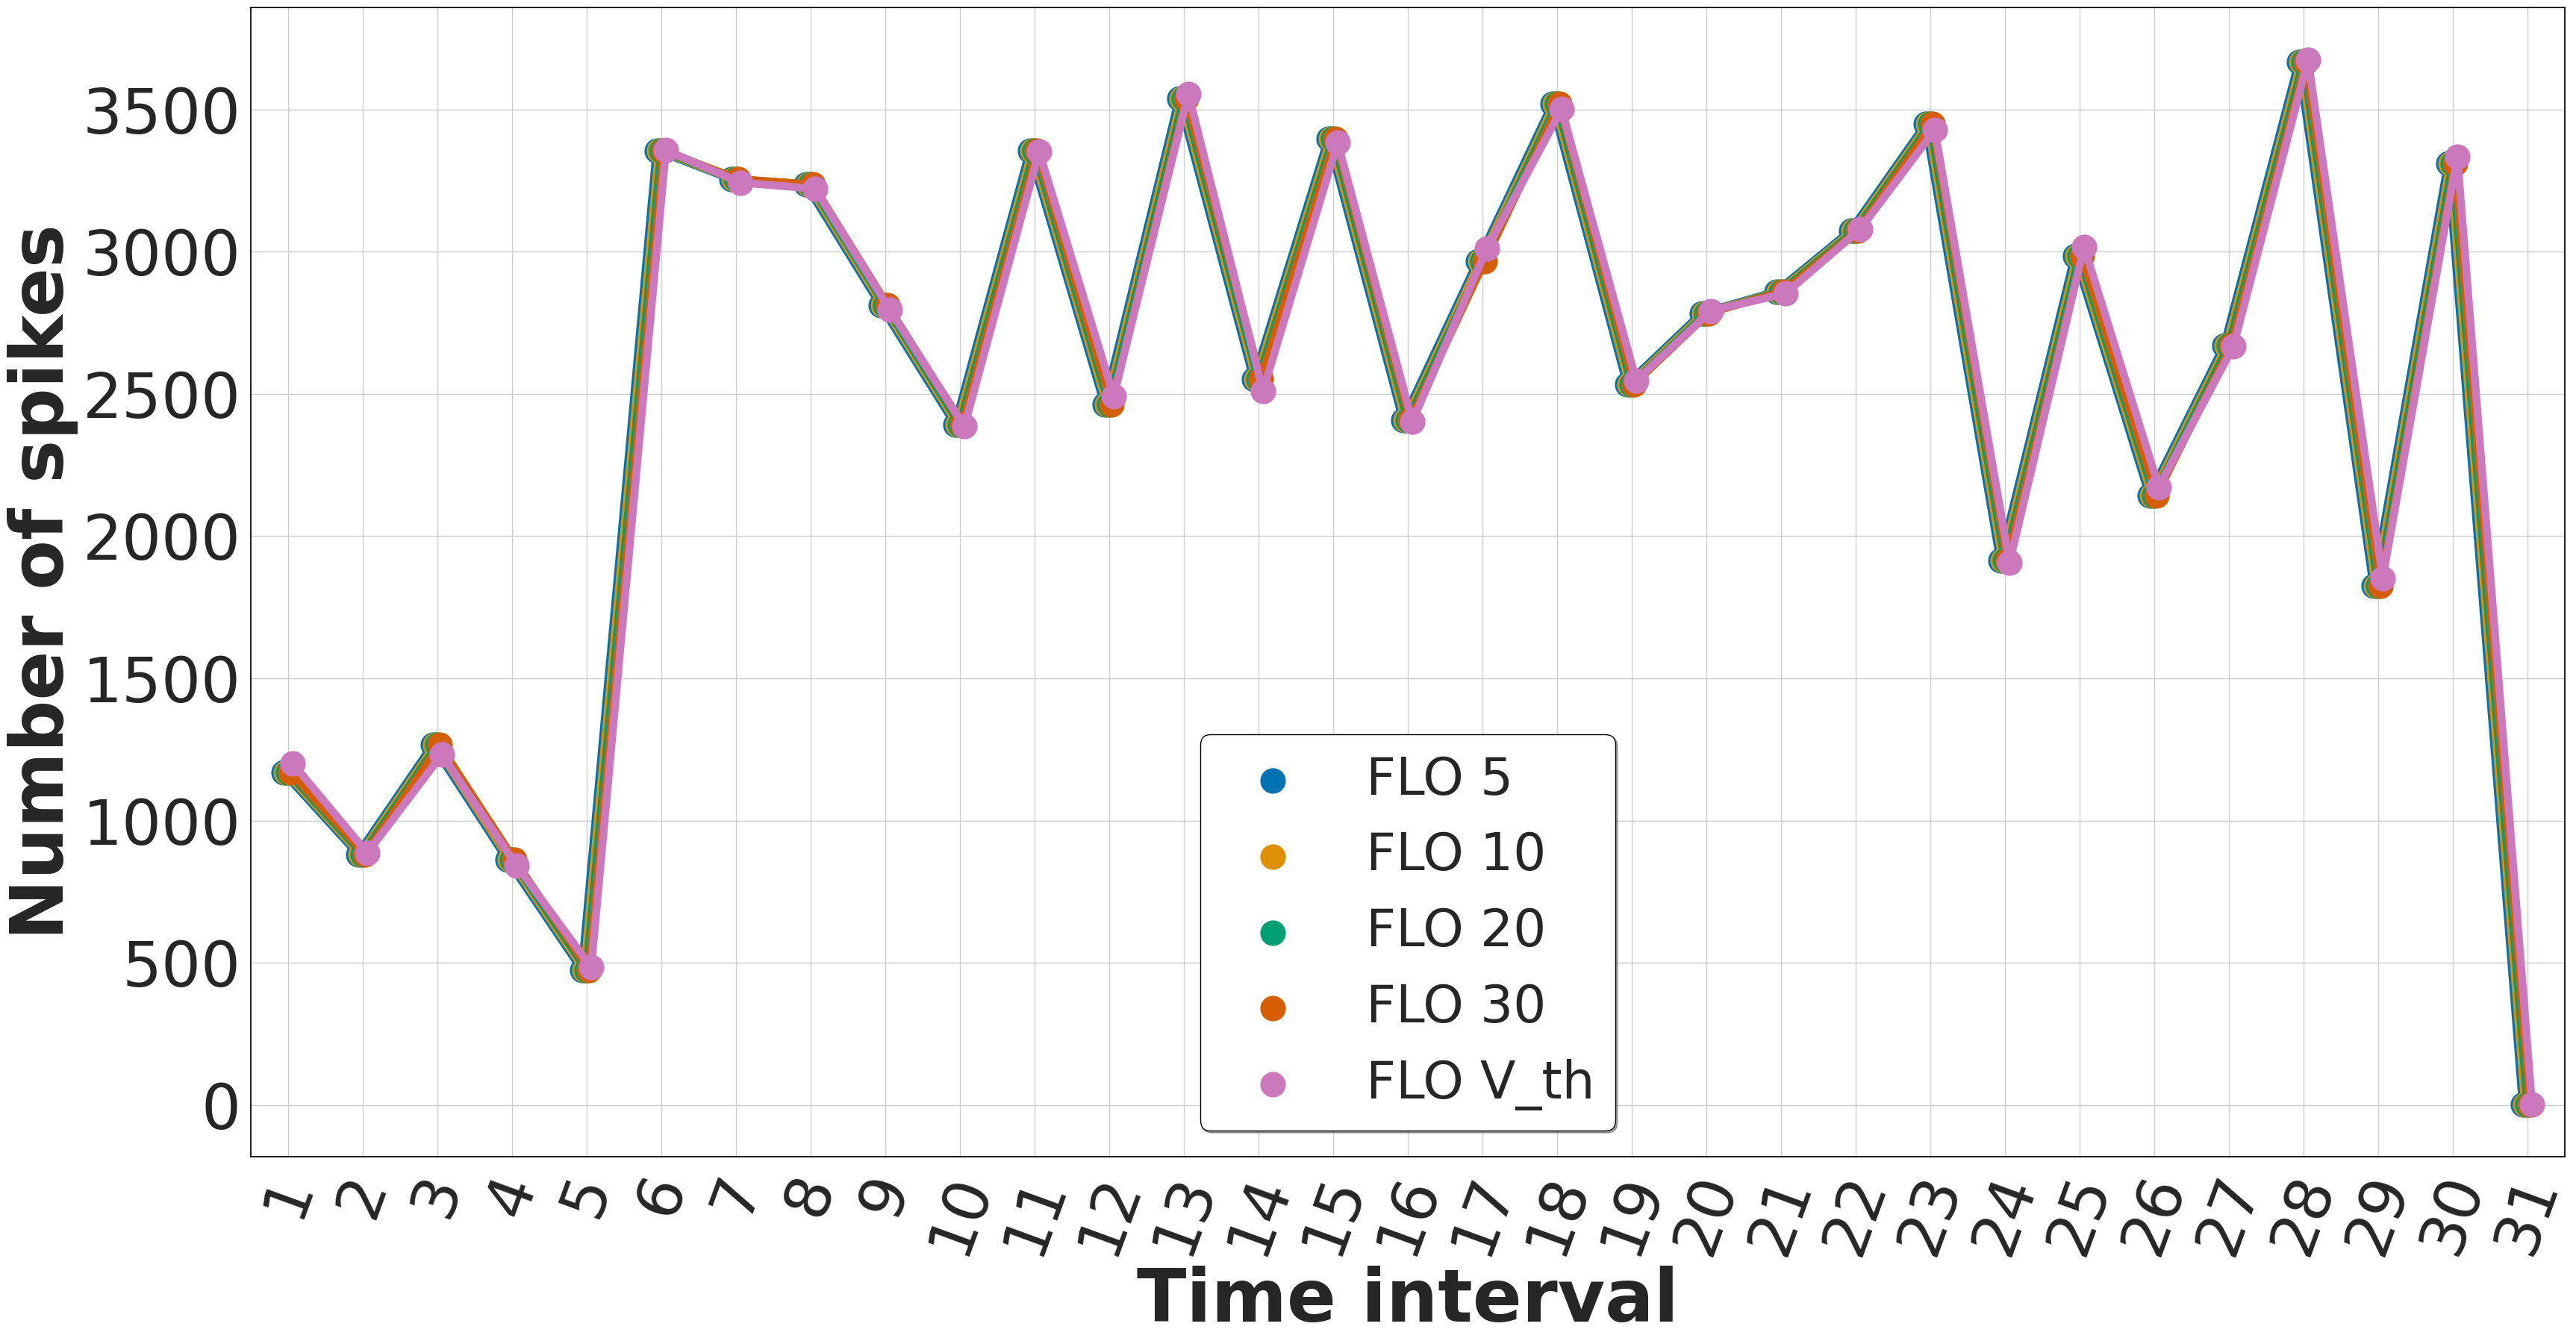

In [8]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set(style="whitegrid",font_scale=2.5, rc={'figure.figsize':(40,20)})
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 70
ticks_size = 60
legend_size = 50
line_size = 60

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result[(result.n_neurons == 450)], hue="attack_n_voltage", errorbar="sd", scale=2.8, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='best', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
ax.xaxis.grid(True)
#plt.show()
plt.savefig("/home/victoria/FLO_voltage_31-bigger.pdf", bbox_inches='tight')

/tmp/ipykernel_1153220/2173207462.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.pointplot(x="position", y="n_spikes", data=result[(result.voltage == 551)  | (result.attack_n_neurons == "Spontaneous")][ (result.position >= 1) & (result.position <= 10)], hue="attack_n_neurons", errorbar="sd", scale=2.8, errwidth=12, ax=ax, dodge=True)


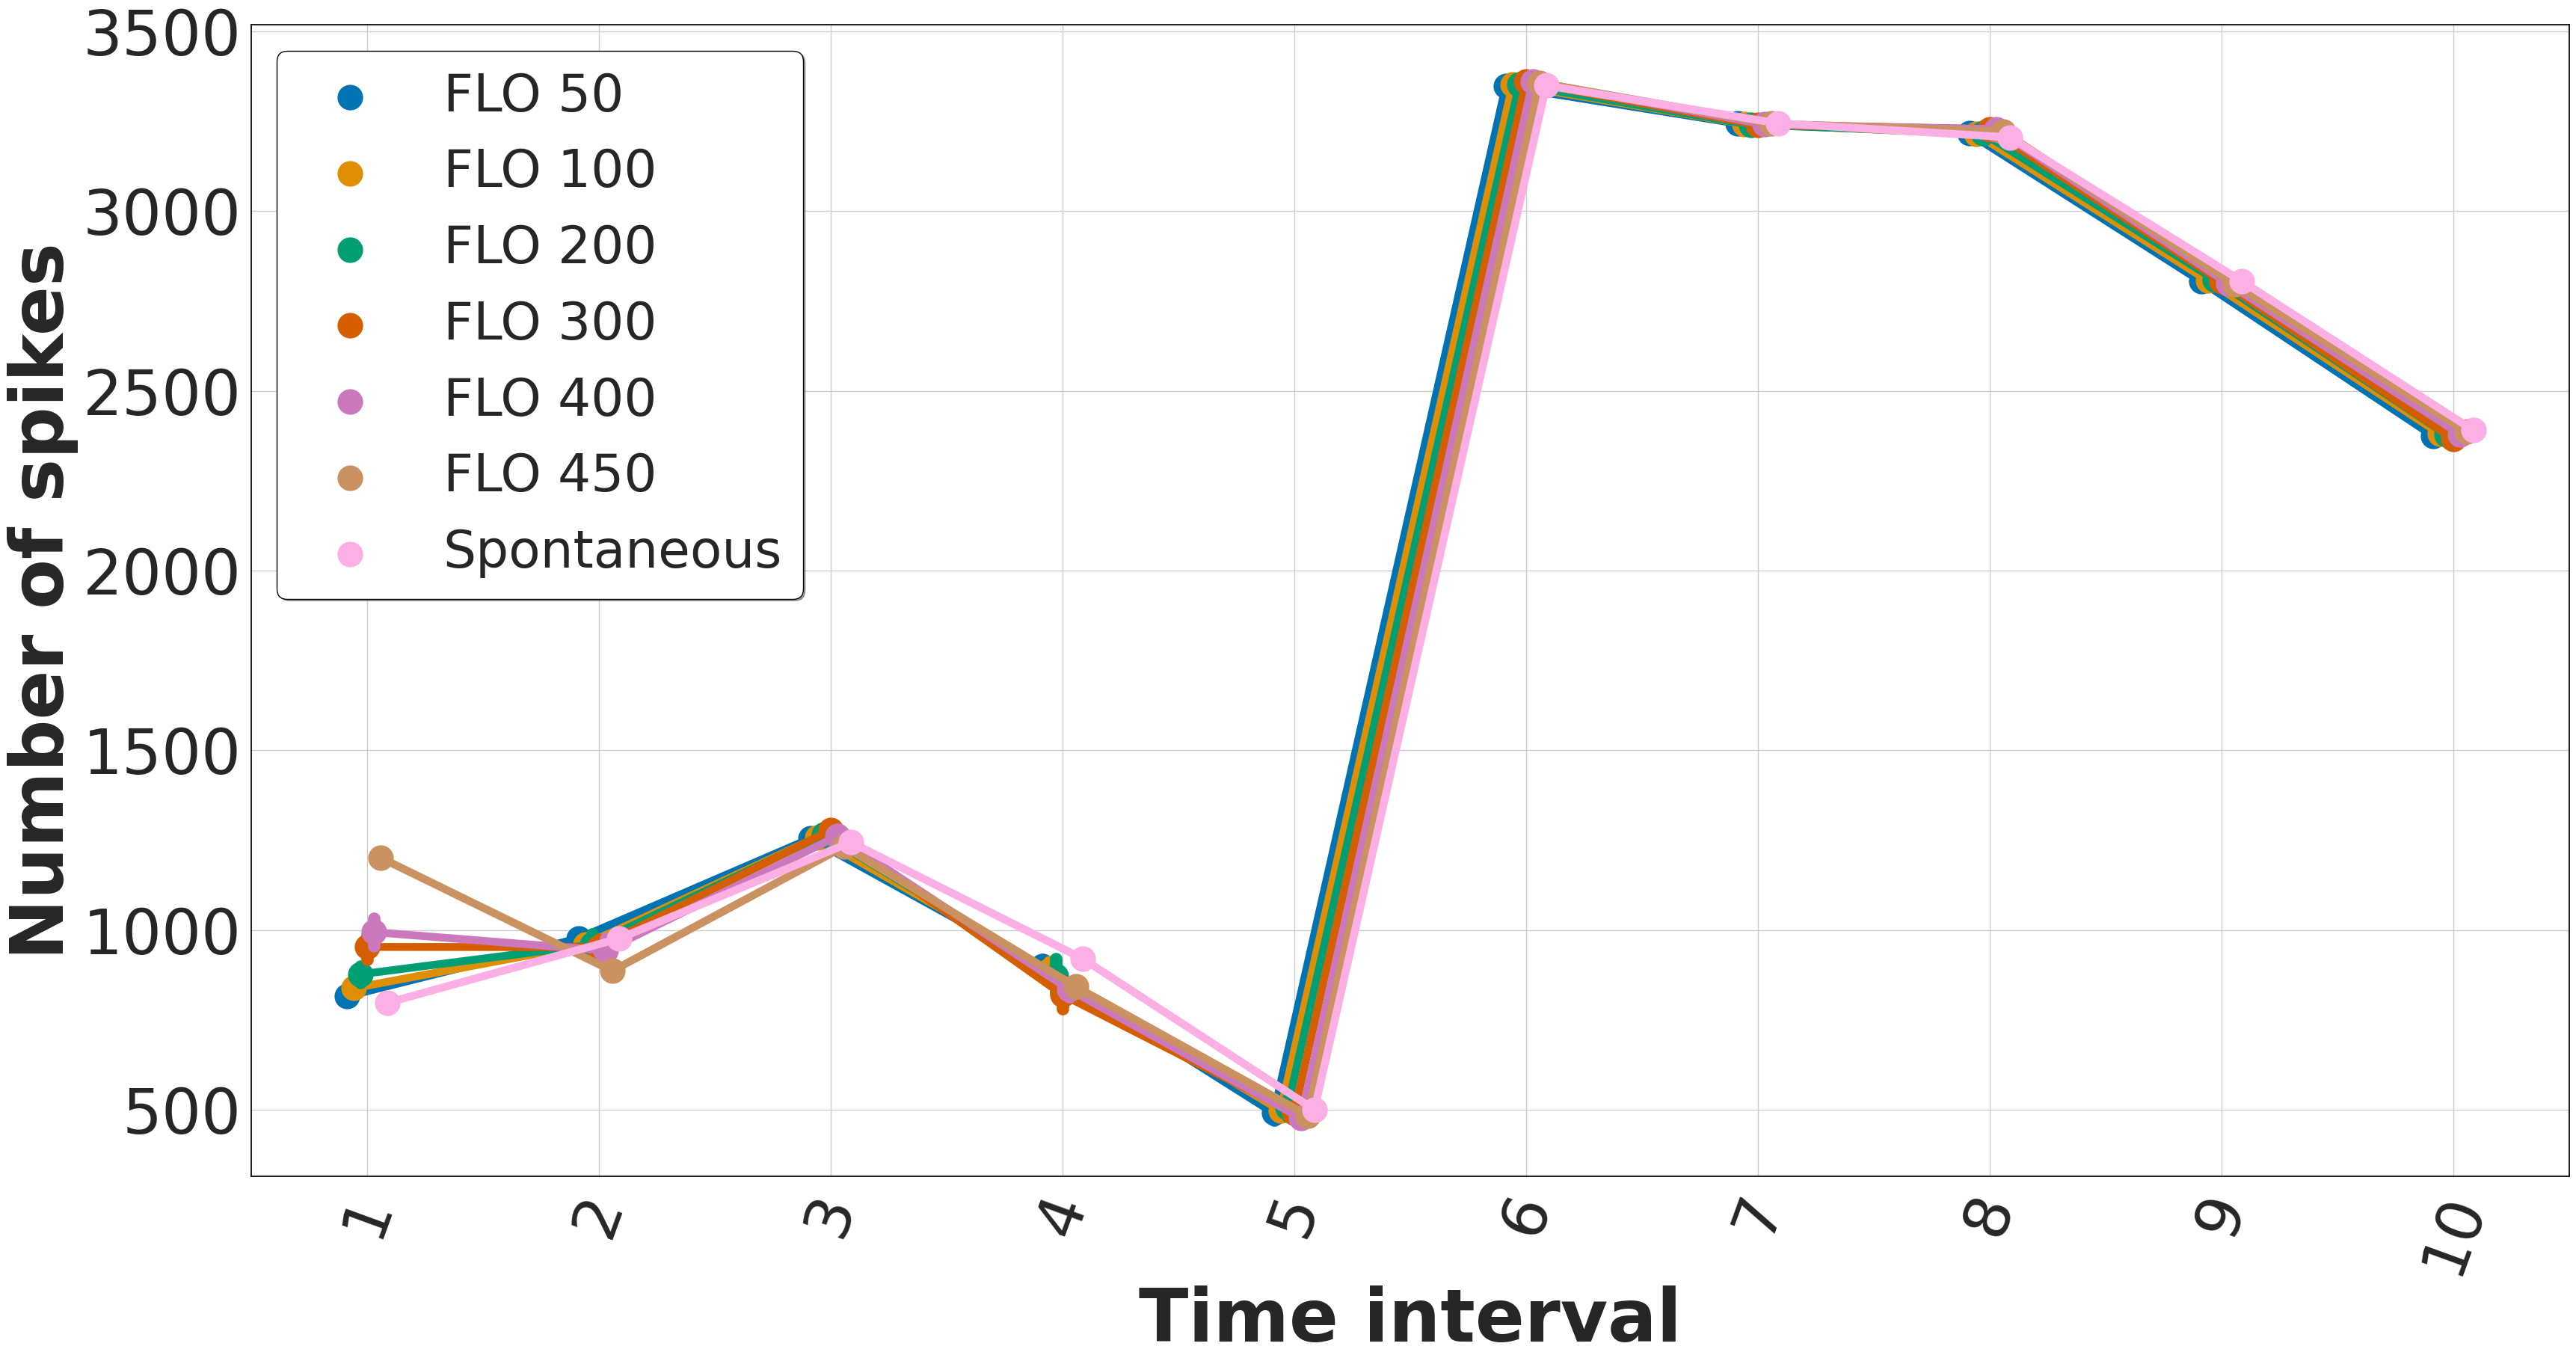

In [16]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set(style="whitegrid",font_scale=2.5, rc={'figure.figsize':(40,20)})
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 70
ticks_size = 60
legend_size = 50
line_size = 60

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result[(result.voltage == 551)  | (result.attack_n_neurons == "Spontaneous")][ (result.position >= 1) & (result.position <= 10)], hue="attack_n_neurons", errorbar="sd", scale=2.8, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='best', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
ax.xaxis.grid(True)
#plt.show()
plt.savefig("/home/victoria/FLO_nNeurons_1-10-bigger.pdf", bbox_inches='tight')

### JAM attack

In [27]:
df_dump_JAM = df_dump_JAM.drop('Unnamed: 0', axis=1)
df_dump_JAM

attack  init_attack  end_attack  n_neurons  n_exec  timestamps  \
0          JAM         1000        1500        100       4      63.827   
1          JAM         1000        1500        100       4     766.639   
2          JAM         1000        1500        100       4     780.516   
3          JAM         1000        1500        100       4     819.173   
4          JAM         1000        1500        100       4     831.691   
...        ...          ...         ...        ...     ...         ...   
4036231    JAM         1000        1500        200       9     638.219   
4036232    JAM         1000        1500        200       9     647.840   
4036233    JAM         1000        1500        200       9     658.944   
4036234    JAM         1000        1500        200       9     673.140   
4036235    JAM         1000        1500        200       9    2995.806   

         node_ids  
0               0  
1             223  
2             223  
3             223  
4             223  
...           ...  
4036231        65  
4036232        65  
4036233        65  
4036234        65  
4036235       449  

[4036236 rows x 7 columns]

In [28]:
df_dump_JAM["timestamps"] = df_dump_JAM["timestamps"].round(1)

df_dump_JAM['position'] = 0
df_dump_JAM['position'] = df_dump_JAM['timestamps']/STEP_TIME
df_dump_JAM['position'] = df_dump_JAM['position'].apply(lambda x: np.floor(x))
df_dump_JAM['position'] = df_dump_JAM['position'].astype(int)

df_dump_JAM = pd.DataFrame(df_dump_JAM.groupby(["attack","init_attack","end_attack","n_neurons","n_exec","timestamps","position"])["node_ids"].count())
df_dump_JAM.reset_index(inplace=True)

df_dump_JAM['position'] += 1

df_dump_JAM

attack  init_attack  end_attack  n_neurons  n_exec  timestamps  \
0          JAM         1000        1500         50       0        21.4   
1          JAM         1000        1500         50       0        21.6   
2          JAM         1000        1500         50       0        32.7   
3          JAM         1000        1500         50       0        52.2   
4          JAM         1000        1500         50       0        52.3   
...        ...          ...         ...        ...     ...         ...   
1346795    JAM         1000        1500        450       9      2999.5   
1346796    JAM         1000        1500        450       9      2999.6   
1346797    JAM         1000        1500        450       9      2999.7   
1346798    JAM         1000        1500        450       9      2999.8   
1346799    JAM         1000        1500        450       9      2999.9   

         position  node_ids  
0               1         1  
1               1         1  
2               1         1  
3               1         1  
4               1         1  
...           ...       ...  
1346795        30         3  
1346796        30         3  
1346797        30         4  
1346798        30         2  
1346799        30         1  

[1346800 rows x 8 columns]

In [29]:
df_normal['attack'] = "Spontaneous"
df_normal = df_normal.drop('Unnamed: 0', axis=1)
df_normal

timestamps  node_ids       attack
0          63.827         0  Spontaneous
1        1449.887       224  Spontaneous
2        1433.860       224  Spontaneous
3        1415.601       224  Spontaneous
4        1388.974       224  Spontaneous
...           ...       ...          ...
76891    1177.530        65  Spontaneous
76892    1171.057        65  Spontaneous
76893    1164.553        65  Spontaneous
76894    1142.583        65  Spontaneous
76895    2995.749       449  Spontaneous

[76896 rows x 3 columns]

In [30]:
df_normal['position'] = 0
df_normal['position'] = df_normal['timestamps']/STEP_TIME
df_normal['position'] = df_normal['position'].apply(lambda x: np.floor(x))
df_normal['position'] = df_normal['position'].astype(int)

df_normal['init_attack'] = 0
df_normal['end_attack'] = 0
#df_normal['voltage'] = 0
df_normal['n_neurons'] = 0
df_normal['n_exec'] = 0

df_normal = pd.DataFrame(df_normal.groupby(["attack","init_attack","end_attack","n_neurons","n_exec","timestamps","position"])["node_ids"].count())
df_normal.reset_index(inplace=True)
df_normal['position'] += 1

df_normal

attack  init_attack  end_attack  n_neurons  n_exec  timestamps  \
0      Spontaneous            0           0          0       0      21.423   
1      Spontaneous            0           0          0       0      21.624   
2      Spontaneous            0           0          0       0      32.691   
3      Spontaneous            0           0          0       0      52.200   
4      Spontaneous            0           0          0       0      52.337   
...            ...          ...         ...        ...     ...         ...   
75601  Spontaneous            0           0          0       0    2999.775   
75602  Spontaneous            0           0          0       0    2999.816   
75603  Spontaneous            0           0          0       0    2999.840   
75604  Spontaneous            0           0          0       0    2999.918   
75605  Spontaneous            0           0          0       0    2999.952   

       position  node_ids  
0             1         1  
1             1         1  
2             1         1  
3             1         1  
4             1         1  
...         ...       ...  
75601        30         1  
75602        30         1  
75603        30         1  
75604        30         1  
75605        30         1  

[75606 rows x 8 columns]

In [31]:
result = pd.concat([df_dump_JAM, df_normal])
result['n_spikes'] = result['node_ids']
result["attack_n_neurons"] = result["attack"].astype("str") + " " + result["n_neurons"].astype("str")
result.loc[result['attack_n_neurons'].isin(['Spontaneous 0']), ['attack_n_neurons']] = ['Spontaneous']
result = pd.DataFrame(result.groupby(["attack","init_attack","end_attack","n_neurons","n_exec","position","attack_n_neurons"])["n_spikes"].sum())
result.reset_index(inplace=True)

result

attack  init_attack  end_attack  n_neurons  n_exec  position  \
0             JAM         1000        1500         50       0         1   
1             JAM         1000        1500         50       0         2   
2             JAM         1000        1500         50       0         3   
3             JAM         1000        1500         50       0         4   
4             JAM         1000        1500         50       0         5   
...           ...          ...         ...        ...     ...       ...   
1826  Spontaneous            0           0          0       0        26   
1827  Spontaneous            0           0          0       0        27   
1828  Spontaneous            0           0          0       0        28   
1829  Spontaneous            0           0          0       0        29   
1830  Spontaneous            0           0          0       0        30   

     attack_n_neurons  n_spikes  
0              JAM 50       796  
1              JAM 50       977  
2              JAM 50      1244  
3              JAM 50       920  
4              JAM 50       500  
...               ...       ...  
1826      Spontaneous      2177  
1827      Spontaneous      2649  
1828      Spontaneous      3677  
1829      Spontaneous      1817  
1830      Spontaneous      3315  

[1831 rows x 8 columns]

In [32]:

posiciones = list(result[result.attack_n_neurons == "JAM 450"].position)
rango = range(1,31)
new_row=[]
for i in rango:
    if not i in posiciones:
        new_row = pd.DataFrame({'attack': 'JAM', 'init_attack': result.loc[i, 'init_attack'],'end_attack': result.loc[i, 'end_attack'], 'n_neurons': 450, 'n_exec': result.loc[i, 'n_exec'], 'position': [i], 'attack_n_neurons': 'JAM 450','n_spikes': 0})
        result = pd.concat([result,new_row],ignore_index=True)



result


attack  init_attack  end_attack  n_neurons  n_exec  position  \
0             JAM         1000        1500         50       0         1   
1             JAM         1000        1500         50       0         2   
2             JAM         1000        1500         50       0         3   
3             JAM         1000        1500         50       0         4   
4             JAM         1000        1500         50       0         5   
...           ...          ...         ...        ...     ...       ...   
1830  Spontaneous            0           0          0       0        30   
1831          JAM         1000        1500        450       0        12   
1832          JAM         1000        1500        450       0        13   
1833          JAM         1000        1500        450       0        14   
1834          JAM         1000        1500        450       0        15   

     attack_n_neurons  n_spikes  
0              JAM 50       796  
1              JAM 50       977  
2              JAM 50      1244  
3              JAM 50       920  
4              JAM 50       500  
...               ...       ...  
1830      Spontaneous      3315  
1831          JAM 450         0  
1832          JAM 450         0  
1833          JAM 450         0  
1834          JAM 450         0  

[1835 rows x 8 columns]

In [94]:
result[(result.n_neurons == 450) & (result.n_spikes == 0)]

attack  init_attack  end_attack  n_neurons  n_exec  position  \
1831    JAM         1000        1500        450       0        12   
1832    JAM         1000        1500        450       0        13   
1833    JAM         1000        1500        450       0        14   
1834    JAM         1000        1500        450       0        15   

     attack_n_neurons  n_spikes  
1831          JAM 450         0  
1832          JAM 450         0  
1833          JAM 450         0  
1834          JAM 450         0

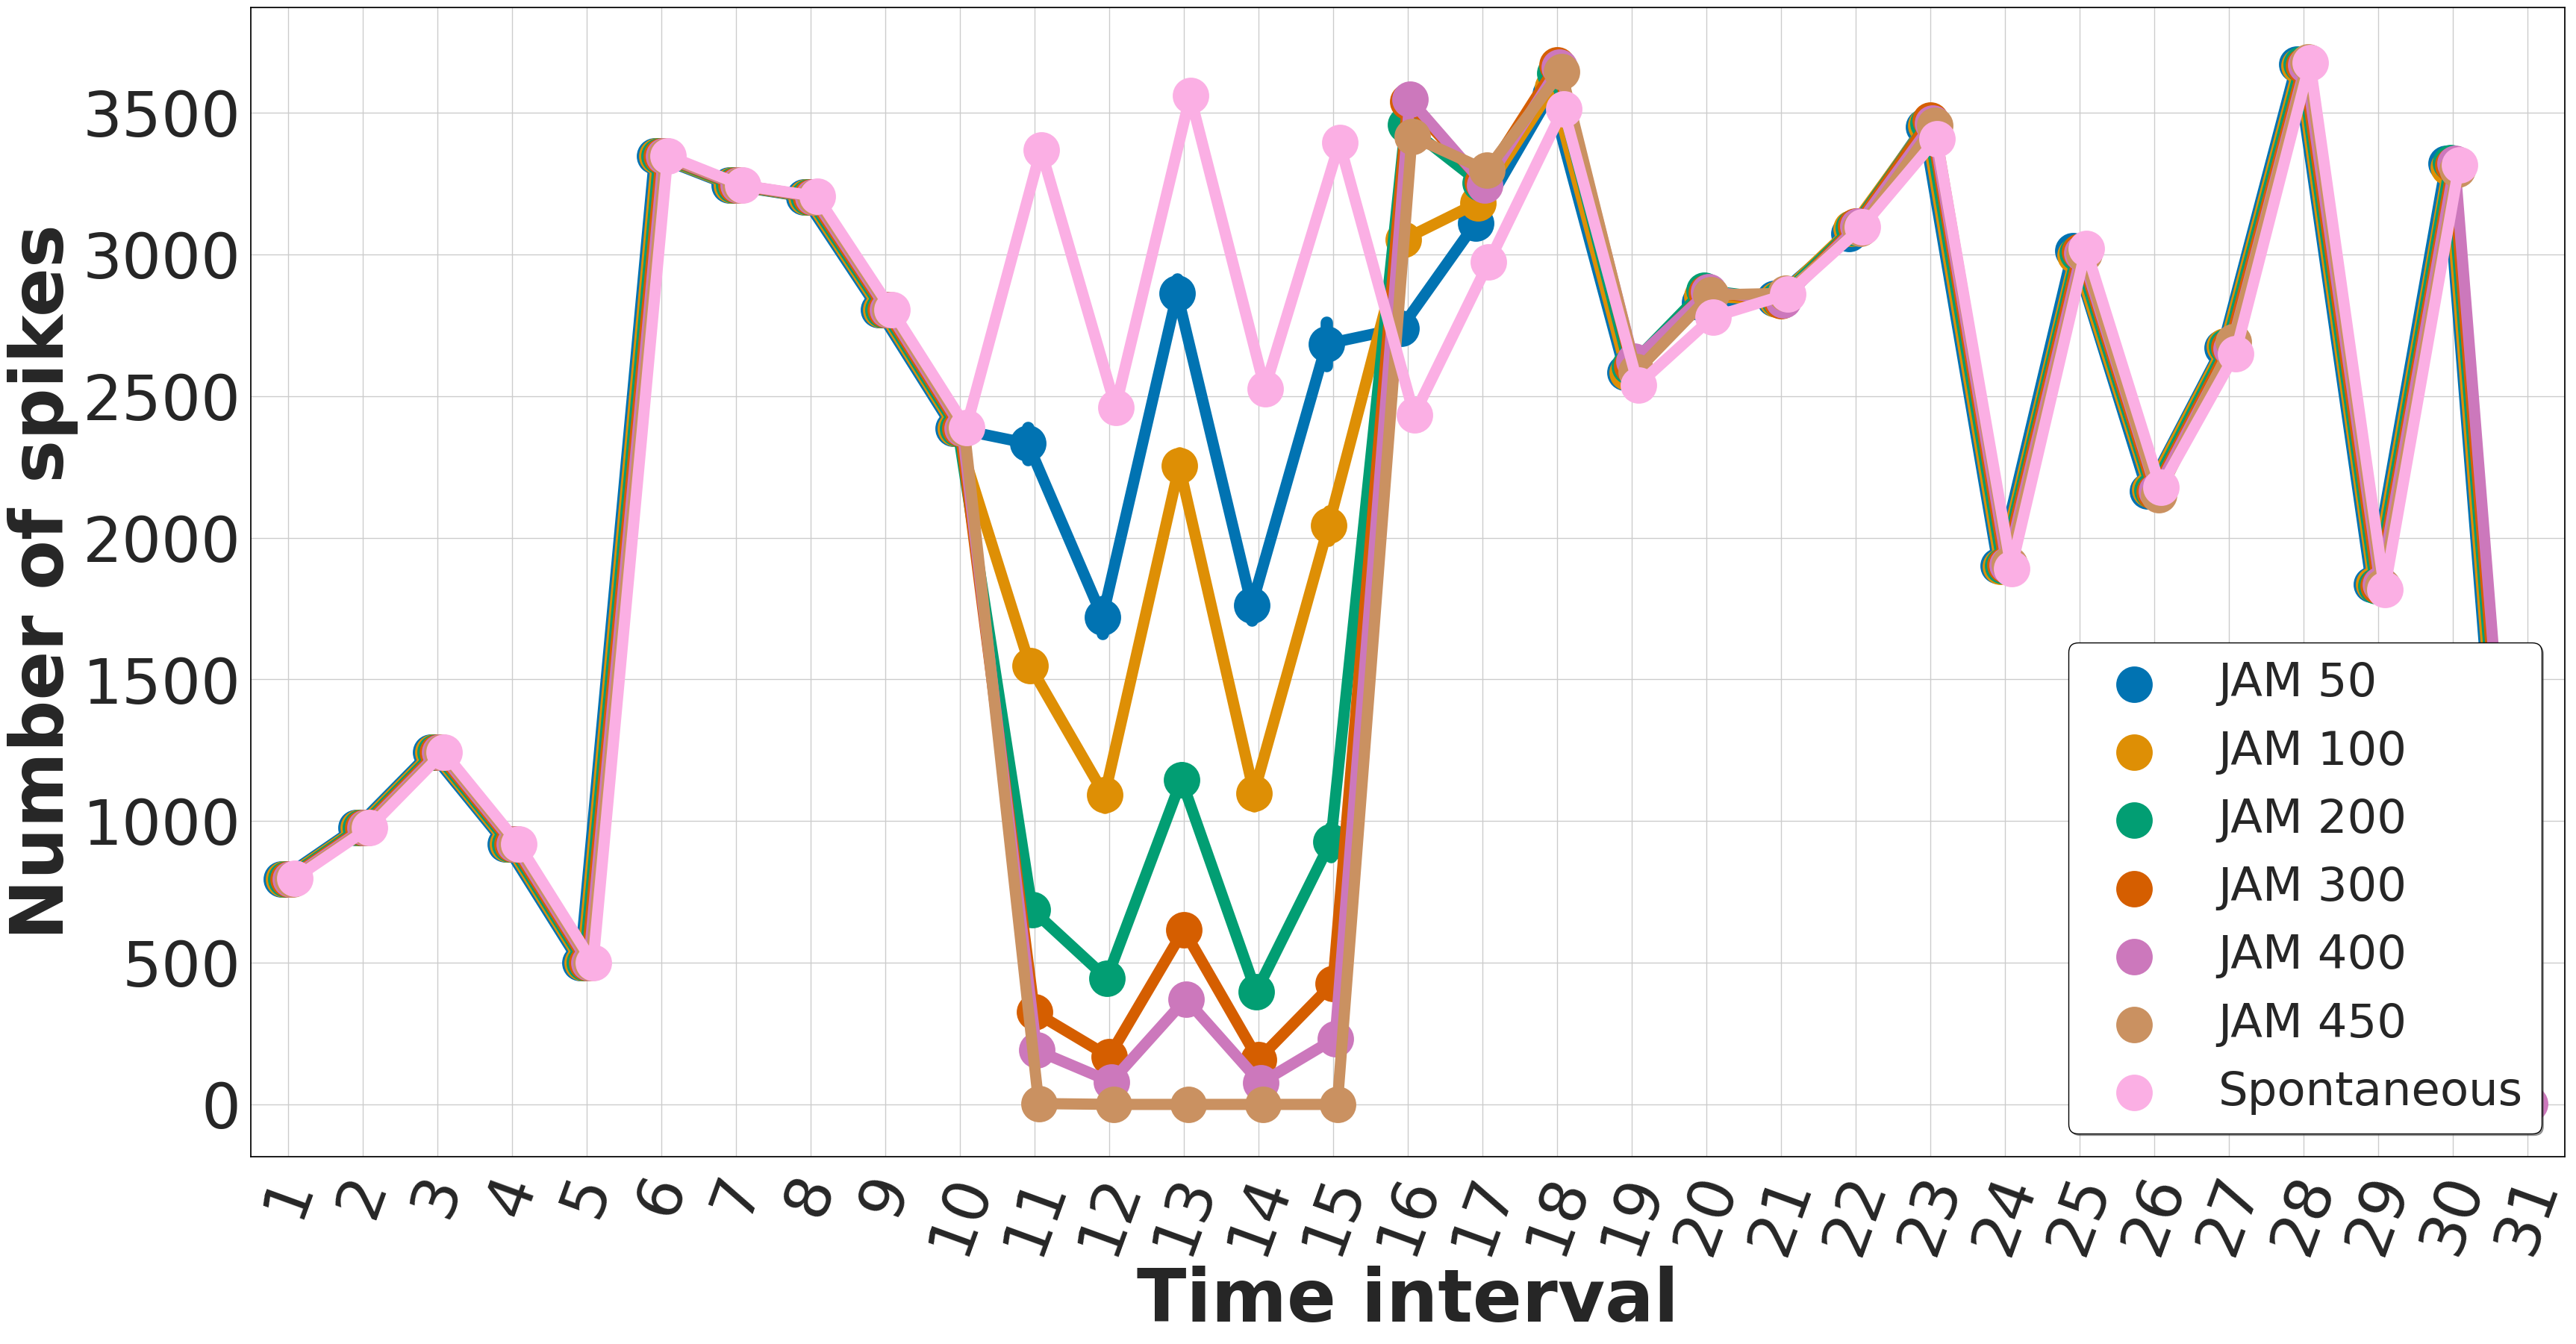

In [39]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set(style="whitegrid",font_scale=2.5, rc={'figure.figsize':(40,20)})
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 70
ticks_size = 60
legend_size = 45
line_size = 60

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result, hue="attack_n_neurons", errorbar="sd", scale=4, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='best', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
ax.xaxis.grid(True)
#plt.show()
plt.savefig("/home/victoria/JAM_nNeurons-bigger.pdf", bbox_inches='tight')

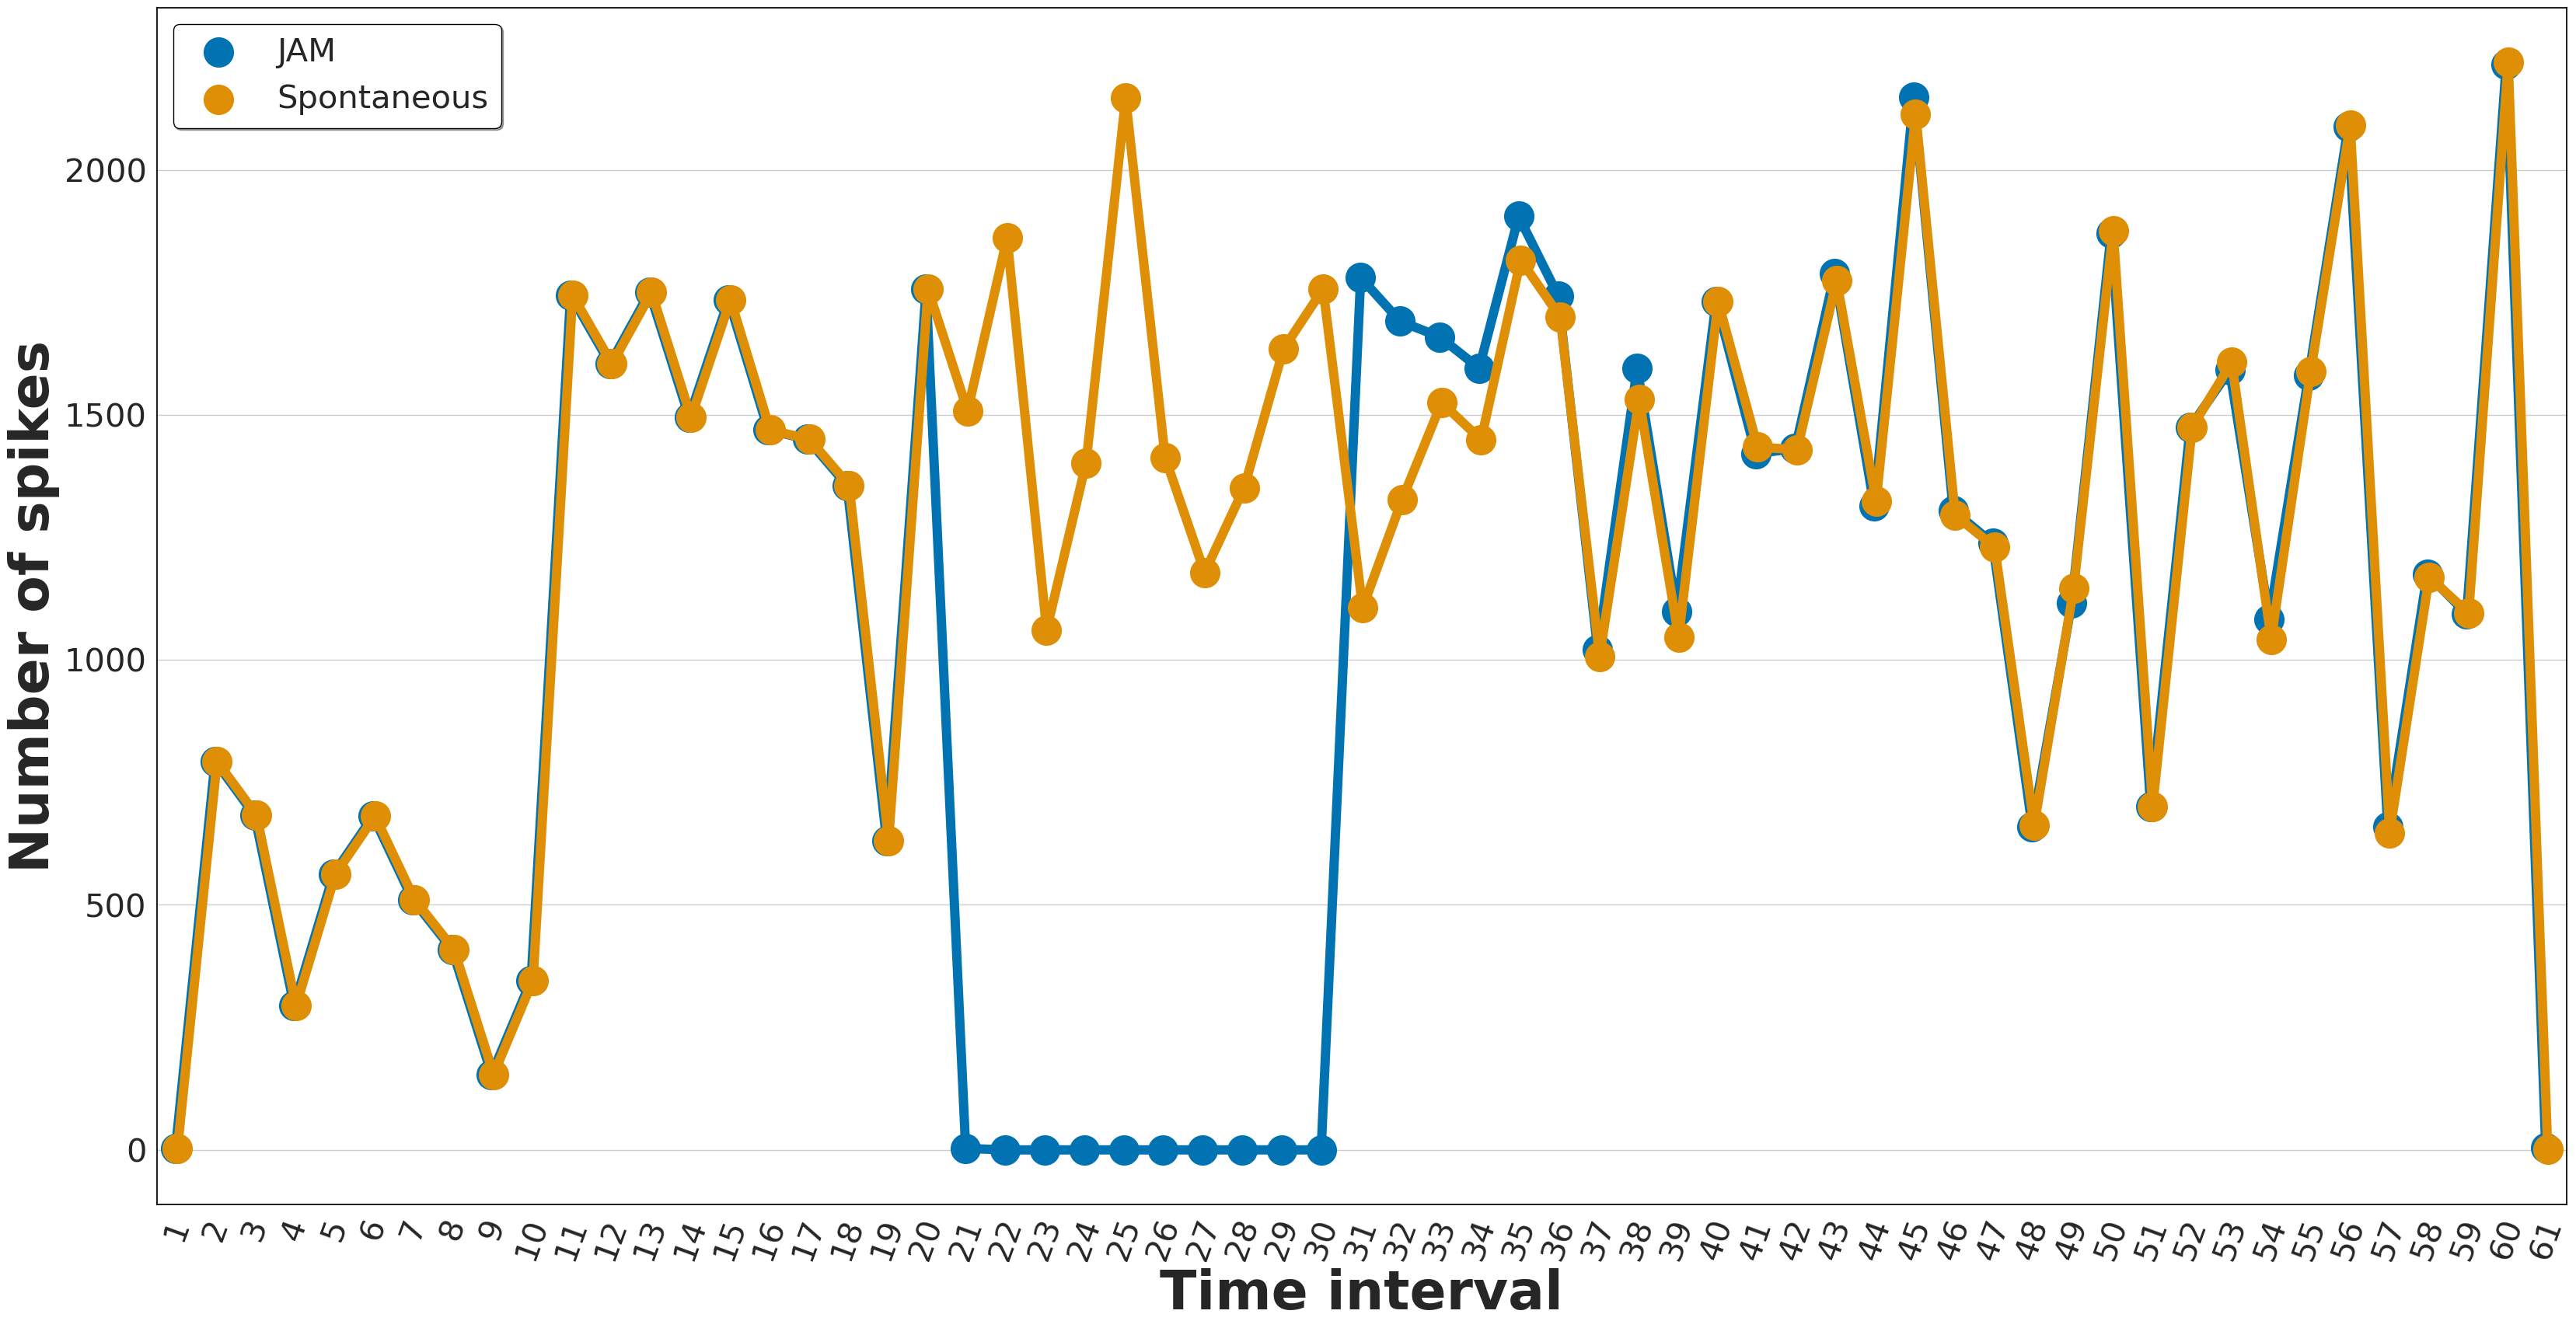

In [73]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set(style="whitegrid",font_scale=2.5, rc={'figure.figsize':(40,20)})
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 50
ticks_size = 30
legend_size = 30
line_size = 25

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result, palette="colorblind", hue="attack", scale=3.2, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='best', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
#plt.show()
plt.savefig("/home/victoria/JAM.pdf", bbox_inches='tight')

### FLOODING PAPER 30 intervals

In [14]:
#df_dump_FLO_30 = df_dump_FLO_30.drop('Unnamed: 0', axis=1)

df_normal_30[(df_normal_30.timestamps > 0) & (df_normal_30.timestamps < 95)]["node_ids"].count()


719

In [42]:
df_dump_FLO_30[(df_dump_FLO_30.timestamps > 0) & (df_dump_FLO_30.timestamps < 95)]["node_ids"].count()

1098

In [12]:
df_dump_FLO_30["timestamps"].round(1)/95

0         0.105263
1        10.043158
2         9.538947
3         9.350526
4         9.176842
           ...    
77118    17.171579
77119    17.090526
77120    17.012632
77121    16.872632
77122    31.534737
Name: timestamps, Length: 77123, dtype: float64

In [33]:
df_dump_FLO_30 = df_dump_FLO_30.drop('Unnamed: 0', axis=1)
df_dump_FLO_30 = df_dump_FLO_30.drop('instants_attack', axis=1)
df_dump_FLO_30 = df_dump_FLO_30.drop('voltage', axis=1)
df_dump_FLO_30 = df_dump_FLO_30.drop('n_neurons', axis=1)
df_dump_FLO_30 = df_dump_FLO_30.drop('n_exec', axis=1)

In [34]:
#df_dump_FLO_30["timestamps"] = df_dump_FLO["timestamps"].round(1)
NUM = 100
df_dump_FLO_30['position'] = 0
df_dump_FLO_30['position'] = df_dump_FLO_30['timestamps']/NUM
df_dump_FLO_30['position'] = df_dump_FLO_30['position'].apply(lambda x: np.floor(x))
df_dump_FLO_30['position'] = df_dump_FLO_30['position'].astype(int)

df_dump_FLO_30 = pd.DataFrame(df_dump_FLO_30.groupby(["attack","position"])["node_ids"].count())
df_dump_FLO_30.reset_index(inplace=True)
df_dump_FLO_30

attack  position  node_ids
0     FLO         0      1169
1     FLO         1       882
2     FLO         2      1266
3     FLO         3       864
4     FLO         4       474
5     FLO         5      3360
6     FLO         6      3251
7     FLO         7      3236
8     FLO         8      2812
9     FLO         9      2396
10    FLO        10      3352
11    FLO        11      2463
12    FLO        12      3538
13    FLO        13      2551
14    FLO        14      3401
15    FLO        15      2404
16    FLO        16      2968
17    FLO        17      3516
18    FLO        18      2535
19    FLO        19      2785
20    FLO        20      2858
21    FLO        21      3075
22    FLO        22      3448
23    FLO        23      1916
24    FLO        24      2986
25    FLO        25      2142
26    FLO        26      2670
27    FLO        27      3667
28    FLO        28      1826
29    FLO        29      3312

In [35]:
#df_normal_30["timestamps"] = df_normal_30["timestamps"].round(1)
NUM = 100
df_normal_30['attack'] = "Spontaneous"
df_normal_30['position'] = 0
df_normal_30['position'] = df_normal_30['timestamps']/NUM
df_normal_30['position'] = df_normal_30['position'].apply(lambda x: np.floor(x))
df_normal_30['position'] = df_normal_30['position'].astype(int)

df_normal_30 = pd.DataFrame(df_normal_30.groupby(["attack","position"])["node_ids"].count())
df_normal_30.reset_index(inplace=True)

df_normal_30


attack  position  node_ids
0   Spontaneous         0       797
1   Spontaneous         1       976
2   Spontaneous         2      1244
3   Spontaneous         3       920
4   Spontaneous         4       500
5   Spontaneous         5      3349
6   Spontaneous         6      3244
7   Spontaneous         7      3205
8   Spontaneous         8      2805
9   Spontaneous         9      2390
10  Spontaneous        10      3370
11  Spontaneous        11      2461
12  Spontaneous        12      3560
13  Spontaneous        13      2527
14  Spontaneous        14      3394
15  Spontaneous        15      2434
16  Spontaneous        16      2973
17  Spontaneous        17      3515
18  Spontaneous        18      2540
19  Spontaneous        19      2779
20  Spontaneous        20      2860
21  Spontaneous        21      3097
22  Spontaneous        22      3409
23  Spontaneous        23      1892
24  Spontaneous        24      3020
25  Spontaneous        25      2177
26  Spontaneous        26      2649
27  Spontaneous        27      3677
28  Spontaneous        28      1817
29  Spontaneous        29      3315

In [36]:
result = pd.concat([df_dump_FLO_30, df_normal_30])
result['n_spikes'] = result['node_ids']
result['position'] += 1

result = pd.DataFrame(result.groupby(["attack","position"])["n_spikes"].sum())

result.reset_index(inplace=True)

result

attack  position  n_spikes
0           FLO         1      1169
1           FLO         2       882
2           FLO         3      1266
3           FLO         4       864
4           FLO         5       474
5           FLO         6      3360
6           FLO         7      3251
7           FLO         8      3236
8           FLO         9      2812
9           FLO        10      2396
10          FLO        11      3352
11          FLO        12      2463
12          FLO        13      3538
13          FLO        14      2551
14          FLO        15      3401
15          FLO        16      2404
16          FLO        17      2968
17          FLO        18      3516
18          FLO        19      2535
19          FLO        20      2785
20          FLO        21      2858
21          FLO        22      3075
22          FLO        23      3448
23          FLO        24      1916
24          FLO        25      2986
25          FLO        26      2142
26          FLO        27      2670
27          FLO        28      3667
28          FLO        29      1826
29          FLO        30      3312
30  Spontaneous         1       797
31  Spontaneous         2       976
32  Spontaneous         3      1244
33  Spontaneous         4       920
34  Spontaneous         5       500
35  Spontaneous         6      3349
36  Spontaneous         7      3244
37  Spontaneous         8      3205
38  Spontaneous         9      2805
39  Spontaneous        10      2390
40  Spontaneous        11      3370
41  Spontaneous        12      2461
42  Spontaneous        13      3560
43  Spontaneous        14      2527
44  Spontaneous        15      3394
45  Spontaneous        16      2434
46  Spontaneous        17      2973
47  Spontaneous        18      3515
48  Spontaneous        19      2540
49  Spontaneous        20      2779
50  Spontaneous        21      2860
51  Spontaneous        22      3097
52  Spontaneous        23      3409
53  Spontaneous        24      1892
54  Spontaneous        25      3020
55  Spontaneous        26      2177
56  Spontaneous        27      2649
57  Spontaneous        28      3677
58  Spontaneous        29      1817
59  Spontaneous        30      3315

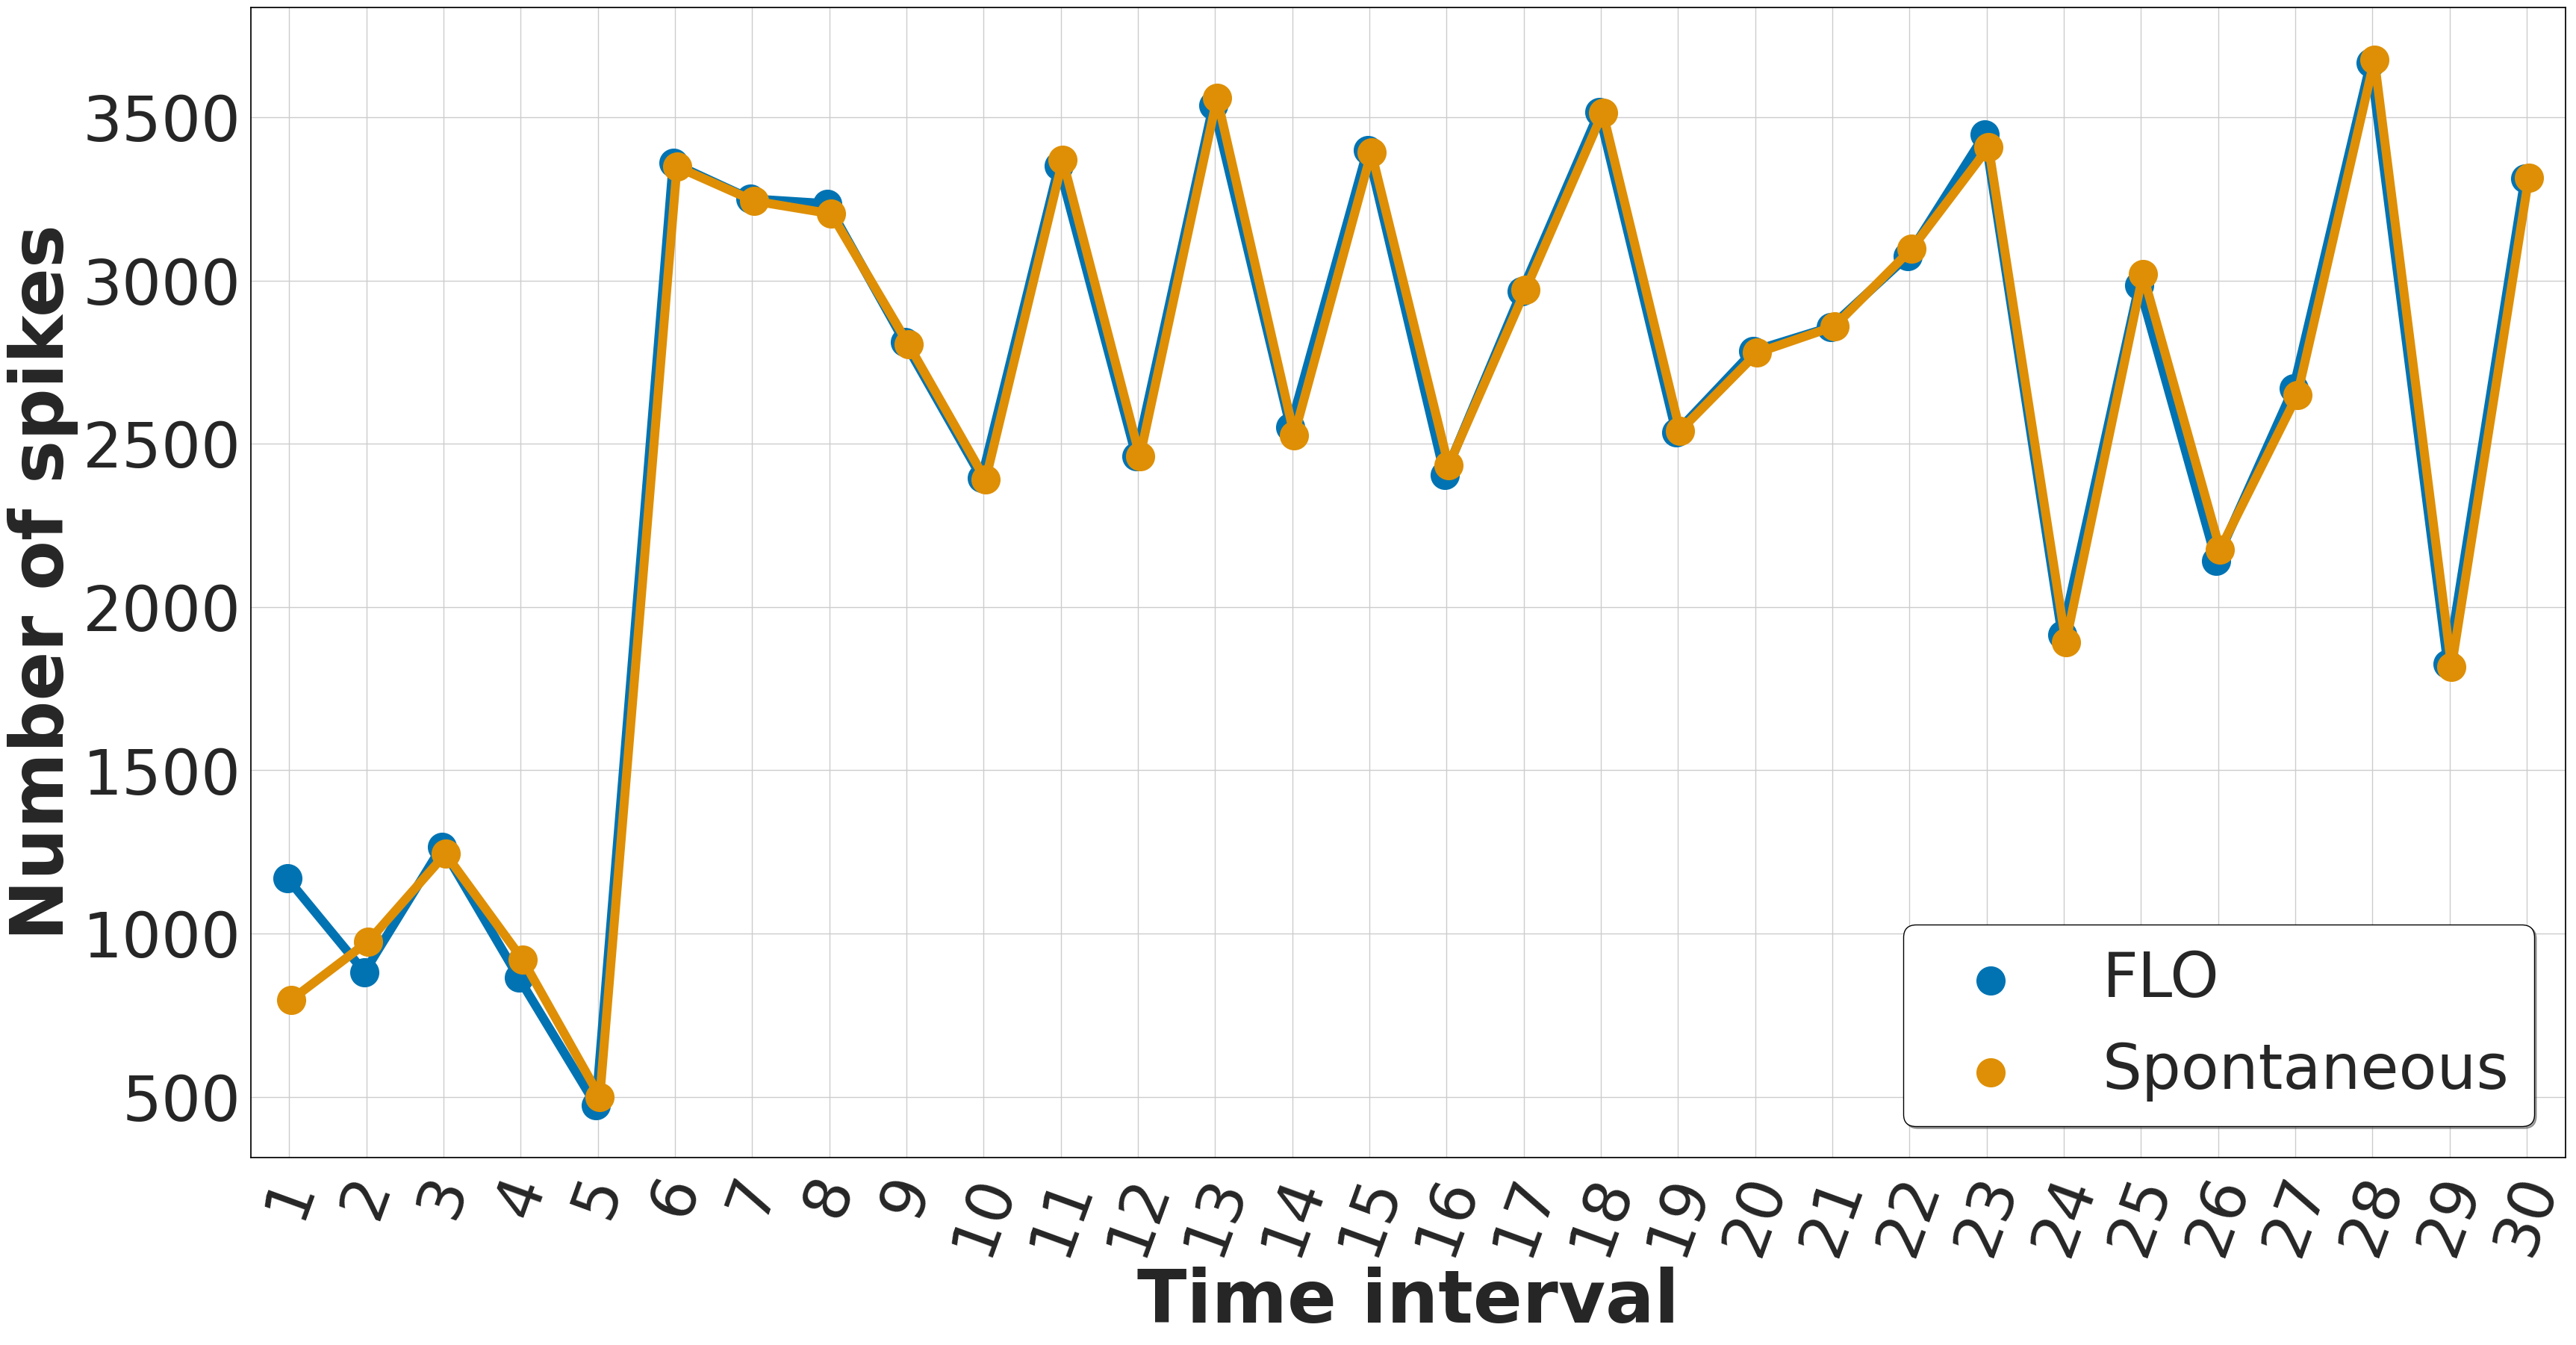

In [37]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set(style="whitegrid",font_scale=2.5, rc={'figure.figsize':(40,20)})
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 70
ticks_size = 60
legend_size = 60
line_size = 40

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result, palette="colorblind", hue="attack", scale=3.2, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='lower right', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
#plt.show()
ax.xaxis.grid(True)
plt.savefig("/home/victoria/FLO.pdf", bbox_inches='tight')


### JAMMING PAPER 30 intervals

In [25]:
df_dump_JAM_30 = df_dump_JAM_30.drop('Unnamed: 0', axis=1)
df_dump_JAM_30 = df_dump_JAM_30.drop('voltage', axis=1)
df_dump_JAM_30 = df_dump_JAM_30.drop('n_neurons', axis=1)
df_dump_JAM_30 = df_dump_JAM_30.drop('n_exec', axis=1)
df_dump_JAM_30 = df_dump_JAM_30.drop('init_attack', axis=1)
df_dump_JAM_30 = df_dump_JAM_30.drop('end_attack', axis=1)
df_dump_JAM_30

attack  timestamps  node_ids
0        JAM      63.827         0
1        JAM    1638.146       223
2        JAM    1664.920       223
3        JAM    1688.838       223
4        JAM    1704.434       223
...      ...         ...       ...
63203    JAM    2090.771        66
63204    JAM    2099.048        66
63205    JAM    2108.422        66
63206    JAM    2121.677        66
63207    JAM    2995.848       449

[63208 rows x 3 columns]

In [26]:
#df_dump_JAM_30["timestamps"] = df_dump_JAM_30["timestamps"].round(1)
NUM = 100
df_dump_JAM_30['position'] = 0
df_dump_JAM_30['position'] = df_dump_JAM_30['timestamps']/NUM
df_dump_JAM_30['position'] = df_dump_JAM_30['position'].apply(lambda x: np.floor(x))
df_dump_JAM_30['position'] = df_dump_JAM_30['position'].astype(int)

df_dump_JAM_30 = pd.DataFrame(df_dump_JAM_30.groupby(["attack","position"])["node_ids"].count())
df_dump_JAM_30.reset_index(inplace=True)

df_dump_JAM_30['position'] += 1
df_dump_JAM_30

attack  position  node_ids
0     JAM         1       797
1     JAM         2       976
2     JAM         3      1244
3     JAM         4       920
4     JAM         5       500
5     JAM         6      3349
6     JAM         7      3244
7     JAM         8      3205
8     JAM         9      2805
9     JAM        10      2390
10    JAM        16      3473
11    JAM        17      3255
12    JAM        18      3647
13    JAM        19      2616
14    JAM        20      2832
15    JAM        21      2849
16    JAM        22      3104
17    JAM        23      3452
18    JAM        24      1898
19    JAM        25      2987
20    JAM        26      2176
21    JAM        27      2674
22    JAM        28      3668
23    JAM        29      1835
24    JAM        30      3312

In [27]:
#df_normal_30["timestamps"] = df_normal_30["timestamps"].round(1)
NUM = 100
df_normal_30['attack'] = "Spontaneous"
df_normal_30['position'] = 0
df_normal_30['position'] = df_normal_30['timestamps']/NUM
df_normal_30['position'] = df_normal_30['position'].apply(lambda x: np.floor(x))
df_normal_30['position'] = df_normal_30['position'].astype(int)

df_normal_30 = pd.DataFrame(df_normal_30.groupby(["attack","position"])["node_ids"].count())
df_normal_30.reset_index(inplace=True)

df_normal_30['position'] += 1

df_normal_30

attack  position  node_ids
0   Spontaneous         1       797
1   Spontaneous         2       976
2   Spontaneous         3      1244
3   Spontaneous         4       920
4   Spontaneous         5       500
5   Spontaneous         6      3349
6   Spontaneous         7      3244
7   Spontaneous         8      3205
8   Spontaneous         9      2805
9   Spontaneous        10      2390
10  Spontaneous        11      3370
11  Spontaneous        12      2461
12  Spontaneous        13      3560
13  Spontaneous        14      2527
14  Spontaneous        15      3394
15  Spontaneous        16      2434
16  Spontaneous        17      2973
17  Spontaneous        18      3515
18  Spontaneous        19      2540
19  Spontaneous        20      2779
20  Spontaneous        21      2860
21  Spontaneous        22      3097
22  Spontaneous        23      3409
23  Spontaneous        24      1892
24  Spontaneous        25      3020
25  Spontaneous        26      2177
26  Spontaneous        27      2649
27  Spontaneous        28      3677
28  Spontaneous        29      1817
29  Spontaneous        30      3315

In [28]:
result = pd.concat([df_dump_JAM_30, df_normal_30])
result['n_spikes'] = result['node_ids']
result = pd.DataFrame(result.groupby(["attack","position"])["n_spikes"].sum())
result.reset_index(inplace=True)

posiciones = list(result[result.attack == "JAM"].position)
rango = range(1,30)
new_row=[]
for i in rango:
    if not i in posiciones:
        new_row = pd.DataFrame({'attack': 'JAM', 'position': [i], 'n_spikes': 0})
        result = pd.concat([result,new_row],ignore_index=True)



result

attack  position  n_spikes
0           JAM         1       797
1           JAM         2       976
2           JAM         3      1244
3           JAM         4       920
4           JAM         5       500
5           JAM         6      3349
6           JAM         7      3244
7           JAM         8      3205
8           JAM         9      2805
9           JAM        10      2390
10          JAM        16      3473
11          JAM        17      3255
12          JAM        18      3647
13          JAM        19      2616
14          JAM        20      2832
15          JAM        21      2849
16          JAM        22      3104
17          JAM        23      3452
18          JAM        24      1898
19          JAM        25      2987
20          JAM        26      2176
21          JAM        27      2674
22          JAM        28      3668
23          JAM        29      1835
24          JAM        30      3312
25  Spontaneous         1       797
26  Spontaneous         2       976
27  Spontaneous         3      1244
28  Spontaneous         4       920
29  Spontaneous         5       500
30  Spontaneous         6      3349
31  Spontaneous         7      3244
32  Spontaneous         8      3205
33  Spontaneous         9      2805
34  Spontaneous        10      2390
35  Spontaneous        11      3370
36  Spontaneous        12      2461
37  Spontaneous        13      3560
38  Spontaneous        14      2527
39  Spontaneous        15      3394
40  Spontaneous        16      2434
41  Spontaneous        17      2973
42  Spontaneous        18      3515
43  Spontaneous        19      2540
44  Spontaneous        20      2779
45  Spontaneous        21      2860
46  Spontaneous        22      3097
47  Spontaneous        23      3409
48  Spontaneous        24      1892
49  Spontaneous        25      3020
50  Spontaneous        26      2177
51  Spontaneous        27      2649
52  Spontaneous        28      3677
53  Spontaneous        29      1817
54  Spontaneous        30      3315
55          JAM        11         0
56          JAM        12         0
57          JAM        13         0
58          JAM        14         0
59          JAM        15         0

In [113]:
result[result.attack == "JAM"]

attack  position  n_spikes
0     JAM         1       718
1     JAM         2      1052
2     JAM         3      1139
3     JAM         4       950
4     JAM         5       362
5     JAM         6      2542
6     JAM         7      3172
7     JAM         8      3098
8     JAM         9      2791
9     JAM        10      1847
10    JAM        11      1759
11    JAM        16       984
12    JAM        17      3176
13    JAM        18      3013
14    JAM        19      3314
15    JAM        20      2502
16    JAM        21      2617
17    JAM        22      2807
18    JAM        23      2879
19    JAM        24      3475
20    JAM        25      2076
21    JAM        26      2444
22    JAM        27      1951
23    JAM        28      2923
24    JAM        29      2572
25    JAM        30      2557
26    JAM        31      2118
27    JAM        32      2370
60    JAM        12         0
61    JAM        13         0
62    JAM        14         0
63    JAM        15         0

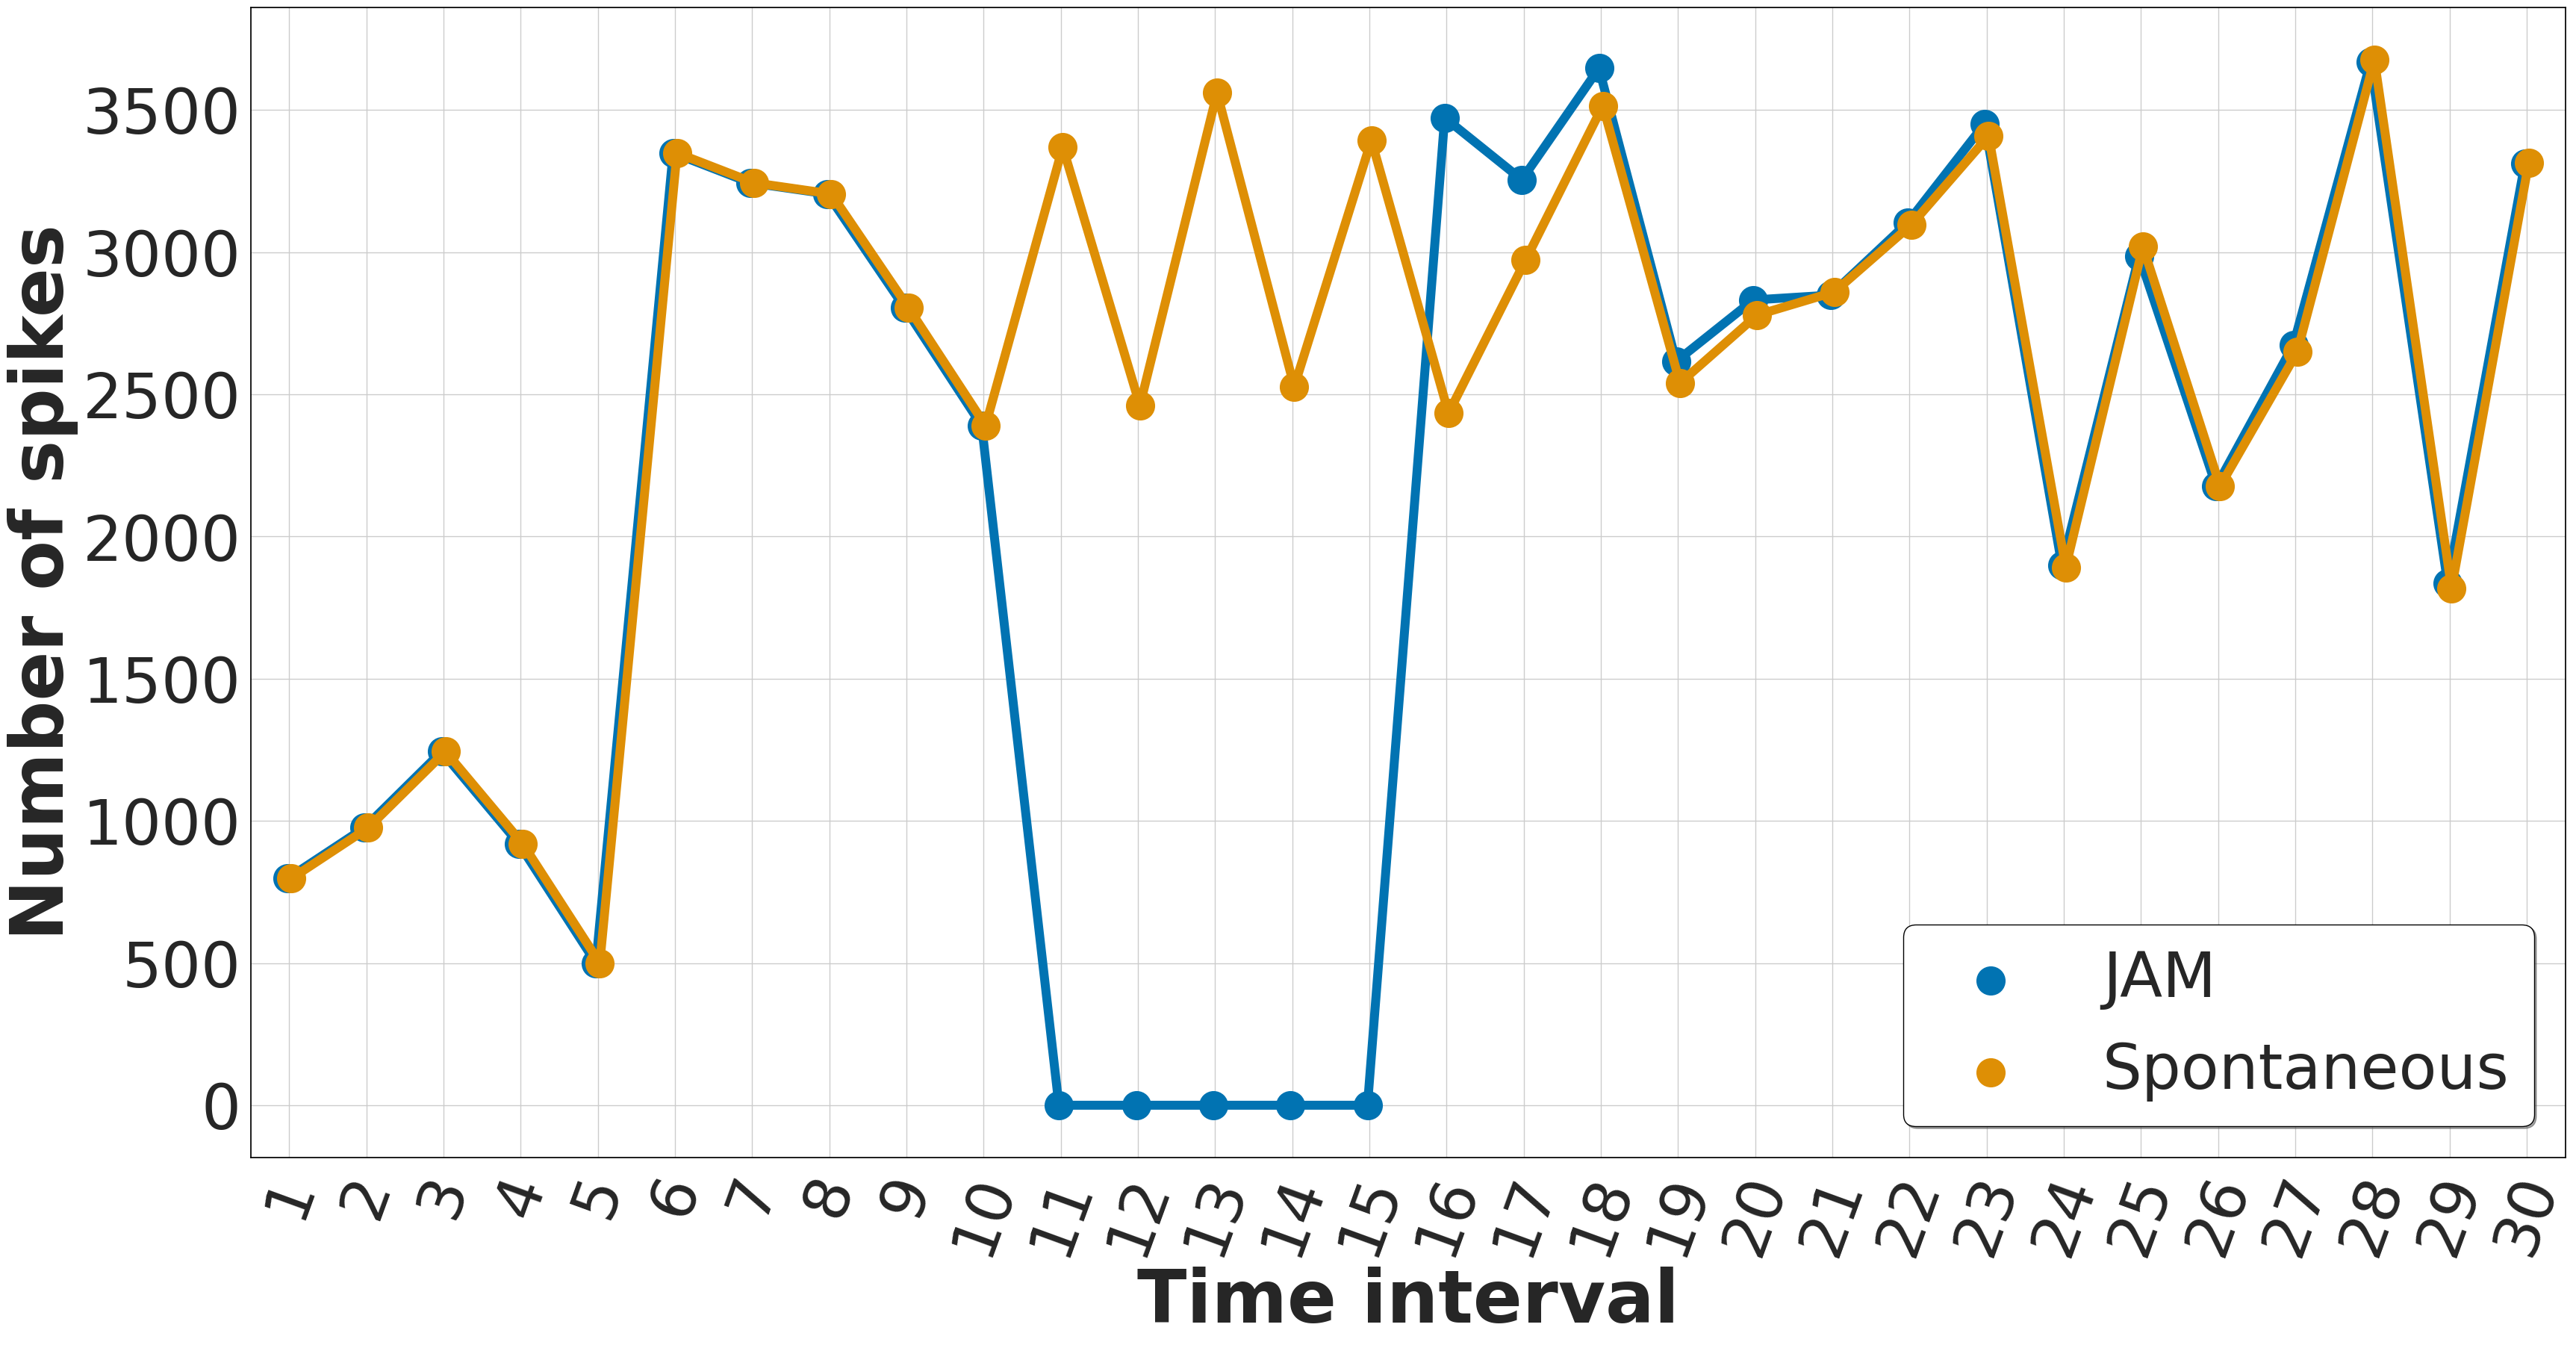

In [31]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set_style("whitegrid")
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 70
ticks_size = 60
legend_size = 60
line_size = 40

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result, palette="colorblind", hue="attack", scale=3.2, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='best', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
#plt.show()
ax.xaxis.grid(True)
plt.savefig("/home/victoria/JAM.pdf", bbox_inches='tight')


### FLOODING 551 neurons adding the voltage

In [11]:
df_dump_FLO_new = df_dump_FLO_new.drop('Unnamed: 0', axis=1)
df_dump_FLO_new = df_dump_FLO_new.drop('instants_attack', axis=1)
df_dump_FLO_new = df_dump_FLO_new.drop('voltage', axis=1)
df_dump_FLO_new = df_dump_FLO_new.drop('n_neurons', axis=1)
df_dump_FLO_new = df_dump_FLO_new.drop('n_exec', axis=1)

In [12]:
NUM = 50
df_dump_FLO_new['position'] = 0
df_dump_FLO_new['position'] = df_dump_FLO_new['timestamps']/NUM
df_dump_FLO_new['position'] = df_dump_FLO_new['position'].apply(lambda x: np.floor(x))
df_dump_FLO_new['position'] = df_dump_FLO_new['position'].astype(int)

df_dump_FLO_new = pd.DataFrame(df_dump_FLO_new.groupby(["attack","position"])["node_ids"].count())
df_dump_FLO_new.reset_index(inplace=True)
df_dump_FLO_new

attack  position  node_ids
0     FLO         0       529
1     FLO         1       640
2     FLO         2       574
3     FLO         3       308
4     FLO         4       584
5     FLO         5       682
6     FLO         6       436
7     FLO         7       428
8     FLO         8       151
9     FLO         9       323
10    FLO        10      1747
11    FLO        11      1613
12    FLO        12      1746
13    FLO        13      1505
14    FLO        14      1727
15    FLO        15      1509
16    FLO        16      1444
17    FLO        17      1368
18    FLO        18       628
19    FLO        19      1768
20    FLO        20      1493
21    FLO        21      1859
22    FLO        22      1061
23    FLO        23      1402
24    FLO        24      2143
25    FLO        25      1395
26    FLO        26      1195
27    FLO        27      1356
28    FLO        28      1632
29    FLO        29      1769
30    FLO        30      1086
31    FLO        31      1318
32    FLO        32      1523
33    FLO        33      1445
34    FLO        34      1821
35    FLO        35      1695
36    FLO        36       993
37    FLO        37      1542
38    FLO        38      1057
39    FLO        39      1728
40    FLO        40      1424
41    FLO        41      1434
42    FLO        42      1775
43    FLO        43      1300
44    FLO        44      2142
45    FLO        45      1306
46    FLO        46      1255
47    FLO        47       661
48    FLO        48      1128
49    FLO        49      1858
50    FLO        50       671
51    FLO        51      1471
52    FLO        52      1606
53    FLO        53      1064
54    FLO        54      1592
55    FLO        55      2075
56    FLO        56       644
57    FLO        57      1182
58    FLO        58      1099
59    FLO        59      2213

In [13]:
#df_normal_30["timestamps"] = df_normal_30["timestamps"].round(1)
NUM = 50
df_normal_30['attack'] = "Spontaneous"
df_normal_30['position'] = 0
df_normal_30['position'] = df_normal_30['timestamps']/NUM
df_normal_30['position'] = df_normal_30['position'].apply(lambda x: np.floor(x))
df_normal_30['position'] = df_normal_30['position'].astype(int)

df_normal_30 = pd.DataFrame(df_normal_30.groupby(["attack","position"])["node_ids"].count())
df_normal_30.reset_index(inplace=True)

df_normal_30


attack  position  node_ids
0   Spontaneous         0         3
1   Spontaneous         1       794
2   Spontaneous         2       683
3   Spontaneous         3       293
4   Spontaneous         4       565
5   Spontaneous         5       679
6   Spontaneous         6       511
7   Spontaneous         7       409
8   Spontaneous         8       154
9   Spontaneous         9       346
10  Spontaneous        10      1744
11  Spontaneous        11      1605
12  Spontaneous        12      1750
13  Spontaneous        13      1494
14  Spontaneous        14      1739
15  Spontaneous        15      1466
16  Spontaneous        16      1450
17  Spontaneous        17      1355
18  Spontaneous        18       633
19  Spontaneous        19      1757
20  Spontaneous        20      1506
21  Spontaneous        21      1864
22  Spontaneous        22      1057
23  Spontaneous        23      1404
24  Spontaneous        24      2145
25  Spontaneous        25      1415
26  Spontaneous        26      1177
27  Spontaneous        27      1350
28  Spontaneous        28      1635
29  Spontaneous        29      1759
30  Spontaneous        30      1104
31  Spontaneous        31      1330
32  Spontaneous        32      1522
33  Spontaneous        33      1451
34  Spontaneous        34      1816
35  Spontaneous        35      1699
36  Spontaneous        36      1008
37  Spontaneous        37      1532
38  Spontaneous        38      1046
39  Spontaneous        39      1733
40  Spontaneous        40      1432
41  Spontaneous        41      1428
42  Spontaneous        42      1776
43  Spontaneous        43      1321
44  Spontaneous        44      2114
45  Spontaneous        45      1295
46  Spontaneous        46      1230
47  Spontaneous        47       662
48  Spontaneous        48      1148
49  Spontaneous        49      1872
50  Spontaneous        50       700
51  Spontaneous        51      1477
52  Spontaneous        52      1605
53  Spontaneous        53      1044
54  Spontaneous        54      1588
55  Spontaneous        55      2089
56  Spontaneous        56       647
57  Spontaneous        57      1170
58  Spontaneous        58      1095
59  Spontaneous        59      2220

In [14]:
result = pd.concat([df_dump_FLO_new, df_normal_30])
result['n_spikes'] = result['node_ids']
result['position'] += 1

result = pd.DataFrame(result.groupby(["attack","position"])["n_spikes"].sum())

result.reset_index(inplace=True)

result

attack  position  n_spikes
0            FLO         1       529
1            FLO         2       640
2            FLO         3       574
3            FLO         4       308
4            FLO         5       584
..           ...       ...       ...
115  Spontaneous        56      2089
116  Spontaneous        57       647
117  Spontaneous        58      1170
118  Spontaneous        59      1095
119  Spontaneous        60      2220

[120 rows x 3 columns]

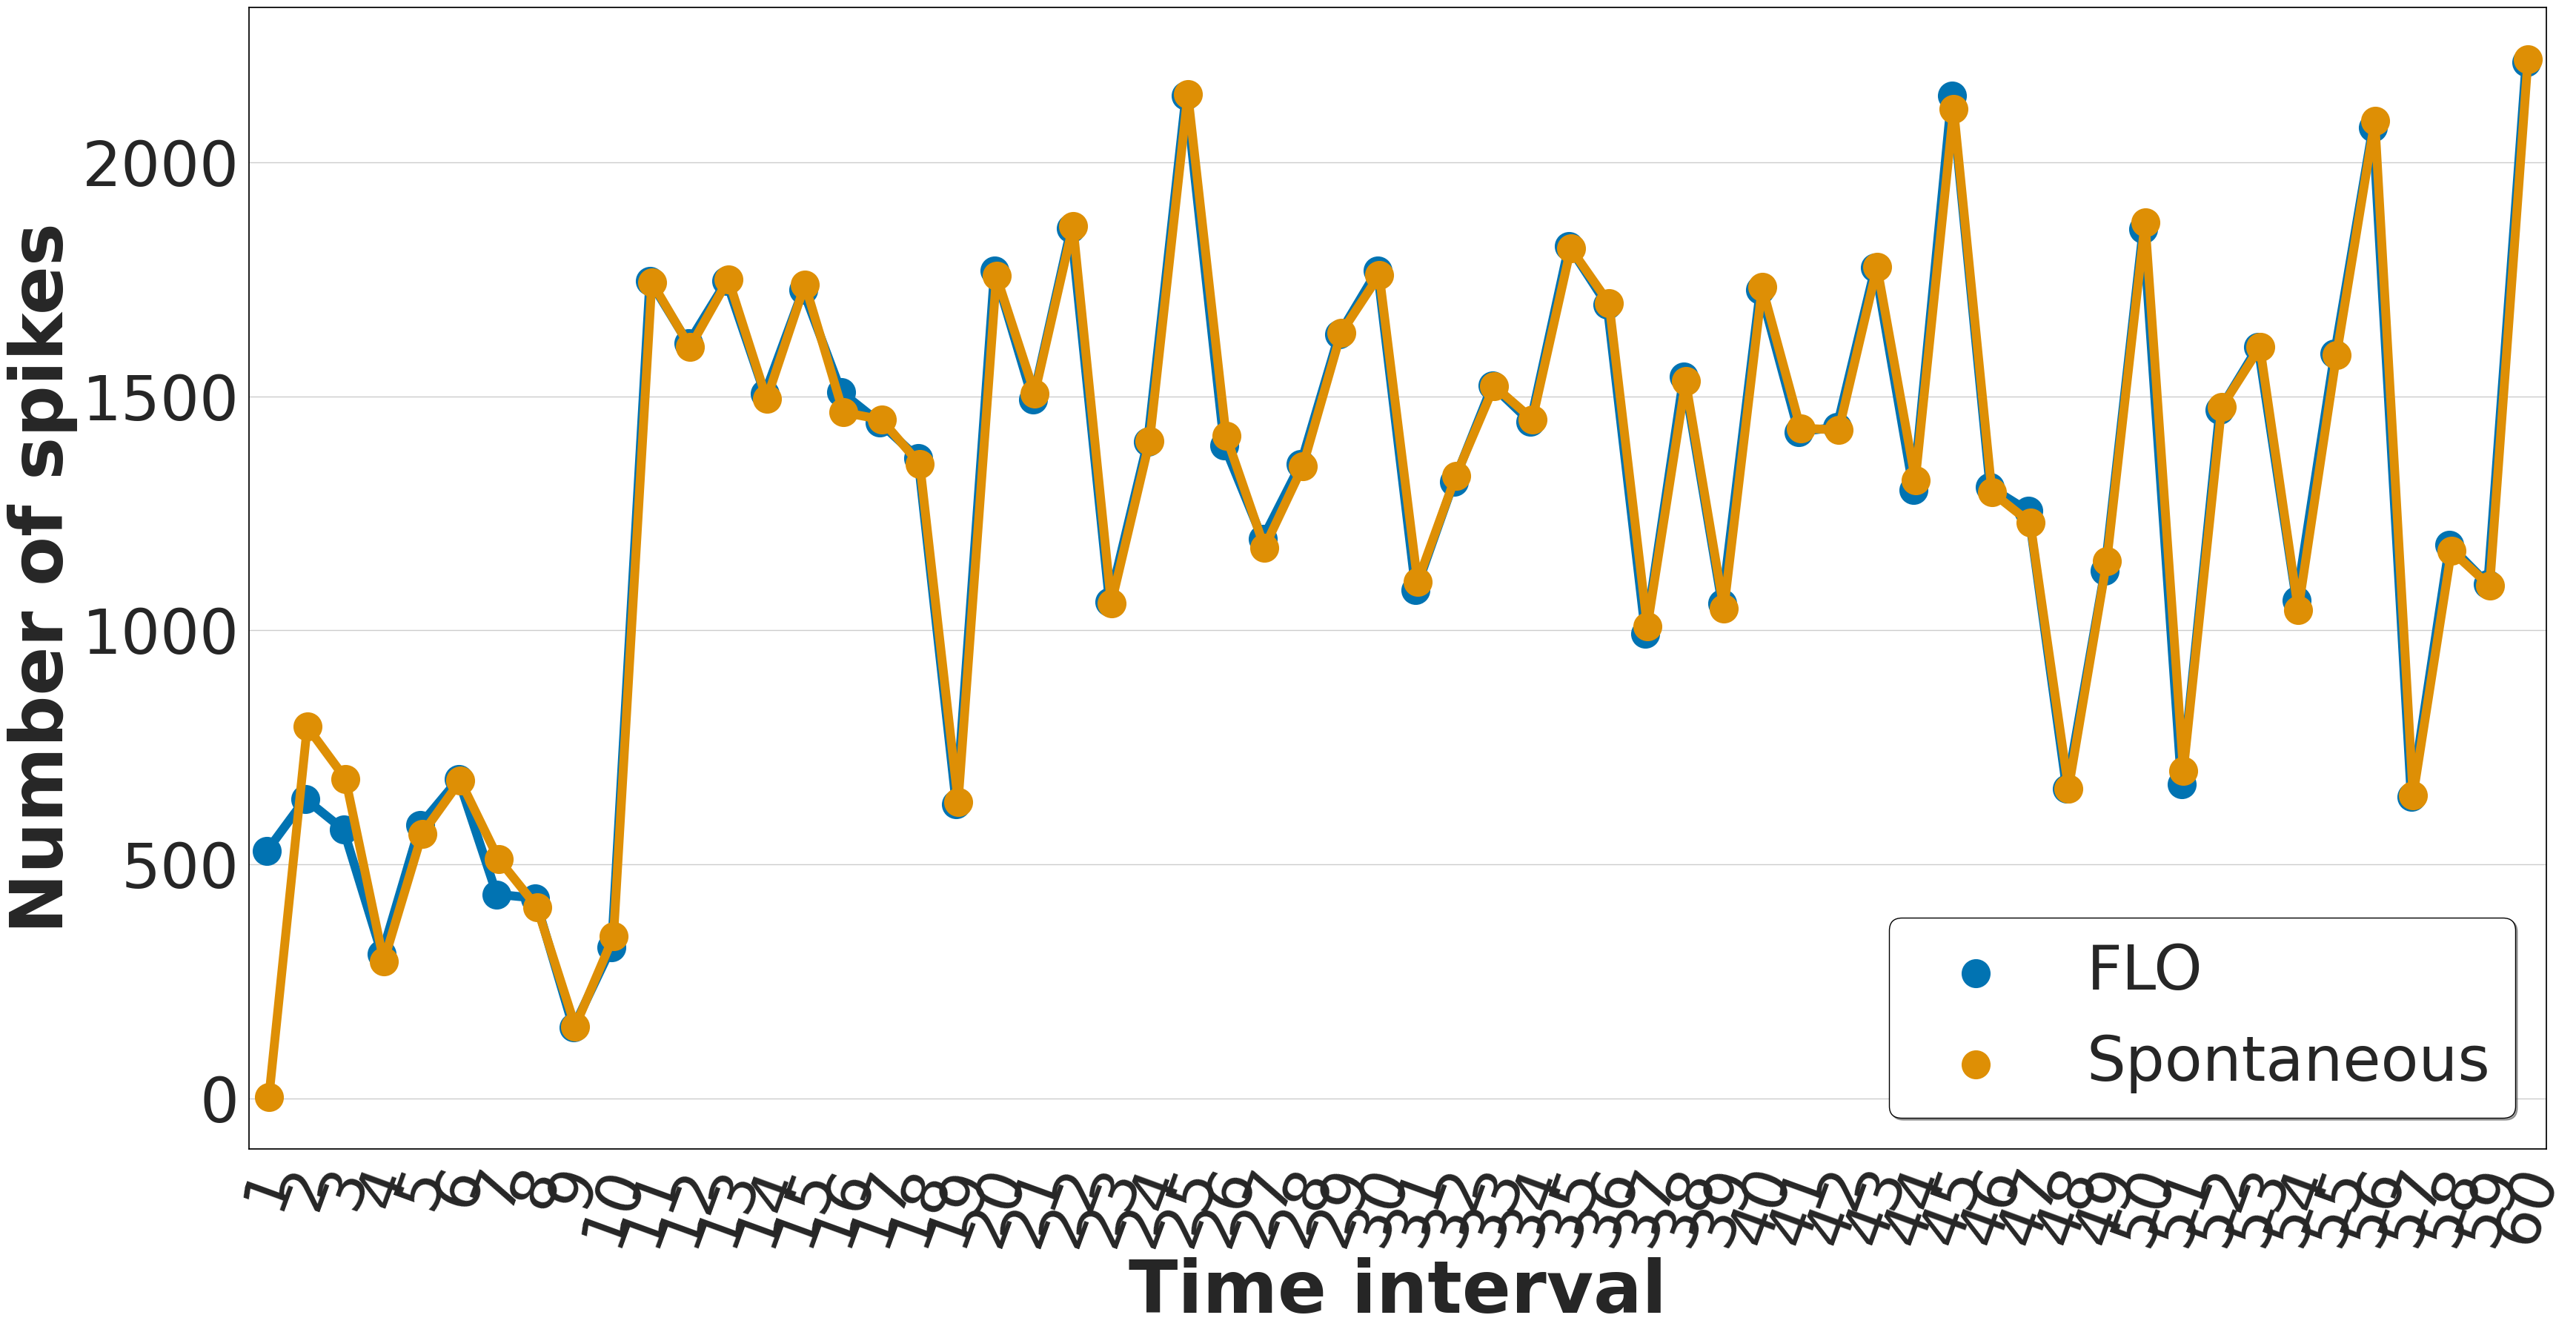

In [15]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set(style="whitegrid",font_scale=2.5, rc={'figure.figsize':(40,20)})
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 70
ticks_size = 60
legend_size = 60
line_size = 40

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result, palette="colorblind", hue="attack", scale=3.2, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='lower right', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
plt.show()
ax.xaxis.grid(True)
#plt.savefig("/home/victoria/FLO.pdf", bbox_inches='tight')

### JAMMING 551 neurons adding the voltage

In [4]:
df_dump_JAM_new = df_dump_JAM_new.drop('Unnamed: 0', axis=1)
df_dump_JAM_new = df_dump_JAM_new.drop('voltage', axis=1)
df_dump_JAM_new = df_dump_JAM_new.drop('n_neurons', axis=1)
df_dump_JAM_new = df_dump_JAM_new.drop('n_exec', axis=1)
df_dump_JAM_new = df_dump_JAM_new.drop('init_attack', axis=1)
df_dump_JAM_new = df_dump_JAM_new.drop('end_attack', axis=1)
df_dump_JAM_new

attack  timestamps  node_ids
0        JAM      63.827         0
1        JAM    2226.119       222
2        JAM    2234.339       222
3        JAM    2244.272       222
4        JAM    2263.632       222
...      ...         ...       ...
59944    JAM    1798.120        66
59945    JAM    1806.750        66
59946    JAM    1813.439        66
59947    JAM    1706.811        66
59948    JAM    2995.635       449

[59949 rows x 3 columns]

In [5]:
NUM = 50
df_dump_JAM_new['position'] = 0
df_dump_JAM_new['position'] = df_dump_JAM_new['timestamps']/NUM
df_dump_JAM_new['position'] = df_dump_JAM_new['position'].apply(lambda x: np.floor(x))
df_dump_JAM_new['position'] = df_dump_JAM_new['position'].astype(int)

df_dump_JAM_new = pd.DataFrame(df_dump_JAM_new.groupby(["attack","position"])["node_ids"].count())
df_dump_JAM_new.reset_index(inplace=True)

df_dump_JAM_new['position'] += 1
df_dump_JAM_new

attack  position  node_ids
0     JAM         1         3
1     JAM         2       794
2     JAM         3       683
3     JAM         4       293
4     JAM         5       565
5     JAM         6       679
6     JAM         7       511
7     JAM         8       409
8     JAM         9       154
9     JAM        10       346
10    JAM        11      1744
11    JAM        12      1605
12    JAM        13      1750
13    JAM        14      1494
14    JAM        15      1739
15    JAM        16      1466
16    JAM        17      1450
17    JAM        18      1355
18    JAM        19       633
19    JAM        20      1757
20    JAM        32       509
21    JAM        33       970
22    JAM        34      1474
23    JAM        35      1708
24    JAM        36      1906
25    JAM        37      1203
26    JAM        38      1695
27    JAM        39      1216
28    JAM        40      1780
29    JAM        41      1437
30    JAM        42      1467
31    JAM        43      1822
32    JAM        44      1296
33    JAM        45      2153
34    JAM        46      1303
35    JAM        47      1255
36    JAM        48       650
37    JAM        49      1183
38    JAM        50      1862
39    JAM        51       677
40    JAM        52      1478
41    JAM        53      1602
42    JAM        54      1073
43    JAM        55      1585
44    JAM        56      2084
45    JAM        57       647
46    JAM        58      1180
47    JAM        59      1097
48    JAM        60      2207

In [6]:
NUM = 50
df_normal_30['attack'] = "Spontaneous"
df_normal_30['position'] = 0
df_normal_30['position'] = df_normal_30['timestamps']/NUM
df_normal_30['position'] = df_normal_30['position'].apply(lambda x: np.floor(x))
df_normal_30['position'] = df_normal_30['position'].astype(int)

df_normal_30 = pd.DataFrame(df_normal_30.groupby(["attack","position"])["node_ids"].count())
df_normal_30.reset_index(inplace=True)

df_normal_30['position'] += 1

df_normal_30

attack  position  node_ids
0   Spontaneous         1         3
1   Spontaneous         2       794
2   Spontaneous         3       683
3   Spontaneous         4       293
4   Spontaneous         5       565
5   Spontaneous         6       679
6   Spontaneous         7       511
7   Spontaneous         8       409
8   Spontaneous         9       154
9   Spontaneous        10       346
10  Spontaneous        11      1744
11  Spontaneous        12      1605
12  Spontaneous        13      1750
13  Spontaneous        14      1494
14  Spontaneous        15      1739
15  Spontaneous        16      1466
16  Spontaneous        17      1450
17  Spontaneous        18      1355
18  Spontaneous        19       633
19  Spontaneous        20      1757
20  Spontaneous        21      1506
21  Spontaneous        22      1864
22  Spontaneous        23      1057
23  Spontaneous        24      1404
24  Spontaneous        25      2145
25  Spontaneous        26      1415
26  Spontaneous        27      1177
27  Spontaneous        28      1350
28  Spontaneous        29      1635
29  Spontaneous        30      1759
30  Spontaneous        31      1104
31  Spontaneous        32      1330
32  Spontaneous        33      1522
33  Spontaneous        34      1451
34  Spontaneous        35      1816
35  Spontaneous        36      1699
36  Spontaneous        37      1008
37  Spontaneous        38      1532
38  Spontaneous        39      1046
39  Spontaneous        40      1733
40  Spontaneous        41      1432
41  Spontaneous        42      1428
42  Spontaneous        43      1776
43  Spontaneous        44      1321
44  Spontaneous        45      2114
45  Spontaneous        46      1295
46  Spontaneous        47      1230
47  Spontaneous        48       662
48  Spontaneous        49      1148
49  Spontaneous        50      1872
50  Spontaneous        51       700
51  Spontaneous        52      1477
52  Spontaneous        53      1605
53  Spontaneous        54      1044
54  Spontaneous        55      1588
55  Spontaneous        56      2089
56  Spontaneous        57       647
57  Spontaneous        58      1170
58  Spontaneous        59      1095
59  Spontaneous        60      2220

In [7]:
result = pd.concat([df_dump_JAM_new, df_normal_30])
result['n_spikes'] = result['node_ids']
result = pd.DataFrame(result.groupby(["attack","position"])["n_spikes"].sum())
result.reset_index(inplace=True)

posiciones = list(result[result.attack == "JAM"].position)
rango = range(1,60)
new_row=[]
for i in rango:
    if not i in posiciones:
        new_row = pd.DataFrame({'attack': 'JAM', 'position': [i], 'n_spikes': 0})
        result = pd.concat([result,new_row],ignore_index=True)



result

attack  position  n_spikes
0      JAM         1         3
1      JAM         2       794
2      JAM         3       683
3      JAM         4       293
4      JAM         5       565
..     ...       ...       ...
115    JAM        27         0
116    JAM        28         0
117    JAM        29         0
118    JAM        30         0
119    JAM        31         0

[120 rows x 3 columns]

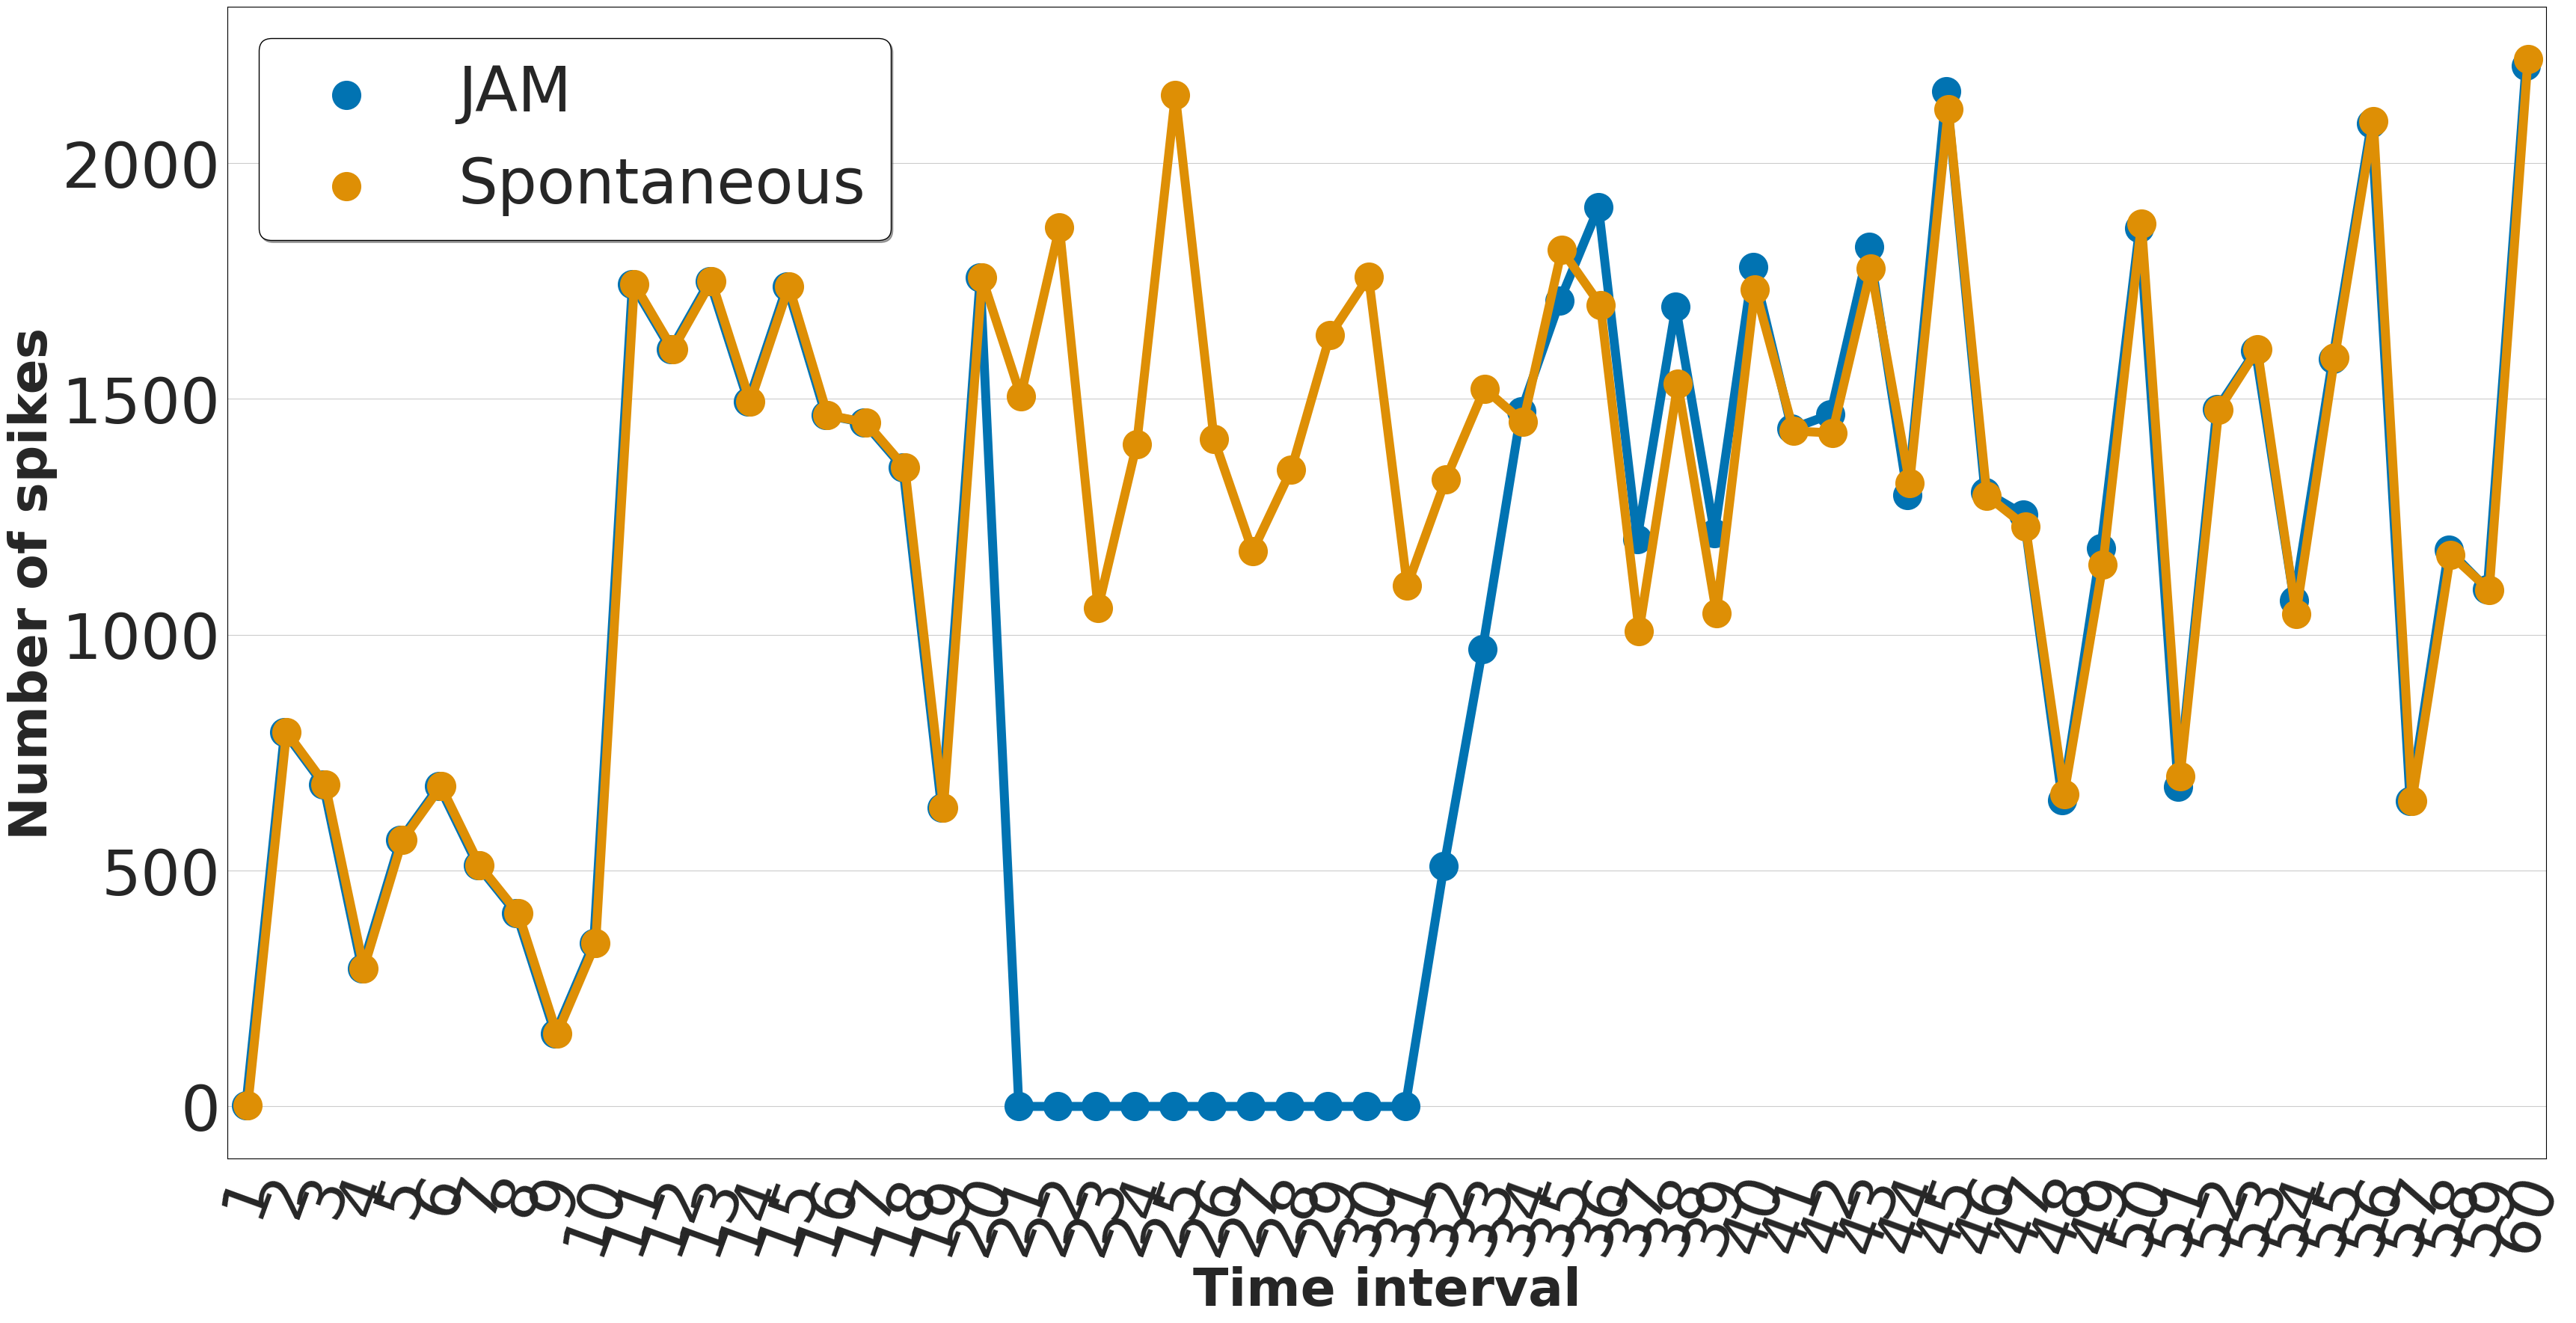

In [9]:
plt.rcParams.update({'font.family': 'monospace'})
sns.set_style("whitegrid")
plt.rcParams['axes.edgecolor'] = "black" #set the value globally
sns.set_palette("colorblind")

label_size = 50
ticks_size = 60
legend_size = 60
line_size = 40

# Number of spikes per position
fig, ax = plt.subplots(figsize=(40,20))

sns.pointplot(x="position", y="n_spikes", data=result, palette="colorblind", hue="attack", scale=3.2, errwidth=12, ax=ax, dodge=True)

ax.set_xlabel("Time interval", fontsize=label_size, fontweight="bold")
ax.set_ylabel("Number of spikes", fontsize=label_size, fontweight="bold")
ax.tick_params(labelsize=ticks_size)

leg = ax.legend(loc='best', fancybox=True, shadow=True, ncol=1, frameon='True',fontsize=legend_size)  
leg.get_frame().set_edgecolor('black')

plt.xticks(rotation=70)
plt.show()
ax.xaxis.grid(True)
#plt.savefig("/home/victoria/JAM.pdf", bbox_inches='tight')